In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing import image
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tqdm import tqdm
from keras.src.saving import load_model
import joblib
import seaborn as sns
import pickle
from PIL import ImageEnhance, Image, ImageOps

In [37]:
clf_ruido = load_model(os.path.join(os.path.dirname(os.getcwd()), 'modelos_treinados', 'best_classificador.h5'))
limpador_ruidos = load_model(os.path.join(os.path.dirname(os.getcwd()), 'modelos_treinados', 'best_model.h5'))

In [38]:
def filtro_nitidez1(img):
    enhancer = ImageEnhance.Sharpness(img)
    imagem_nitida = enhancer.enhance(2.0)
    return imagem_nitida

def filtro_nitidez2(img_path):
    kernel_sharpening = np.array([[ -1, -1, -1],
                                  [ -1,  9, -1],
                                  [ -1, -1, -1]])
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    sharpened = cv2.filter2D(image, -1, kernel_sharpening)
    blurred = cv2.GaussianBlur(sharpened, (5, 5), 0)
    median_filtered = cv2.medianBlur(blurred, 3)
    return median_filtered

def verifica_necessidade_limpeza(clf_ruido, img_array):
    pred = clf_ruido.predict(img_array)
    return pred[0][0] > 0.5


In [39]:
def resize_with_padding(image, target_size=(128, 128)):
    image = ImageOps.contain(image, target_size, method=Image.Resampling.LANCZOS)
    padded_img = ImageOps.pad(image, target_size, method=Image.Resampling.LANCZOS, color=(255))
    return padded_img

def load_images_with_padding(folder, target_size=(128, 128)):
    images = []
    for filename in os.listdir(folder):
        if 'png' in filename or 'PNG' in filename or 'jpg' in filename or 'jpeg' in filename:
            image = Image.open(os.path.join(folder, filename)).convert('L')
            padded_img = resize_with_padding(image, target_size)
            images.append(img_to_array(padded_img) / 255.0)
    return np.array(images)

In [40]:
original_path = "../dados/full_org/"
forged_path = "../dados/full_forg/"

output_original_path = "../dados/full_org_pre_proc/"
output_forged_path = "../dados/full_forg_pre_proc/"

In [41]:
dict_paths = {original_path: output_original_path,
              forged_path: output_forged_path}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

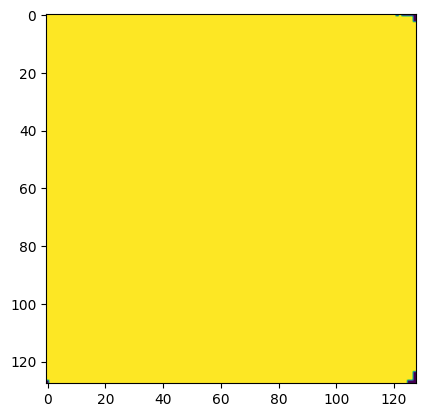

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

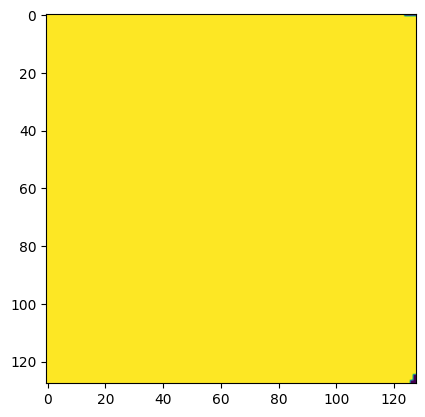

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


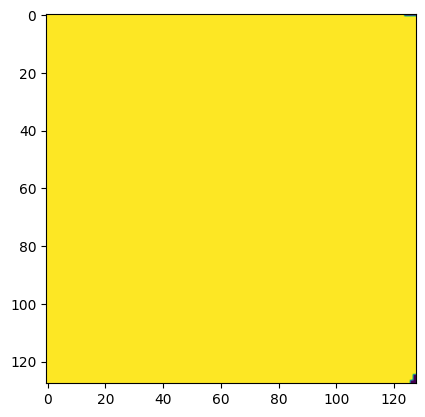

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/s

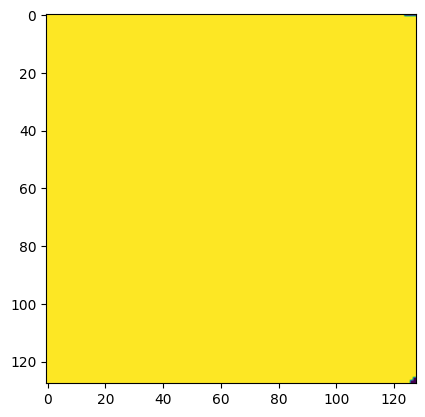

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
forgeries_50_15.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


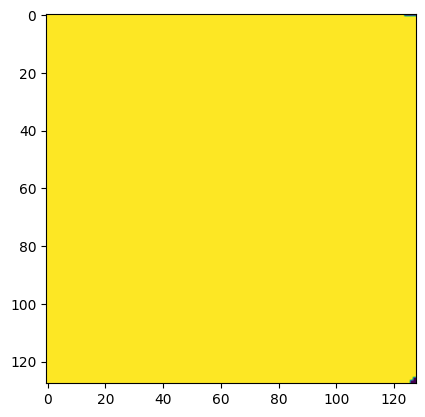

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
forgeries_50_21.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


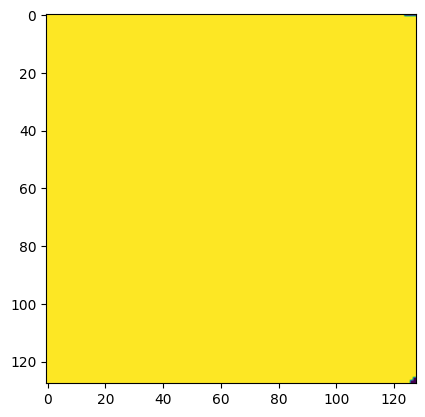

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

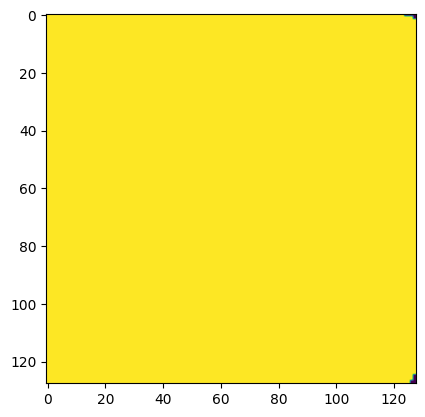

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms

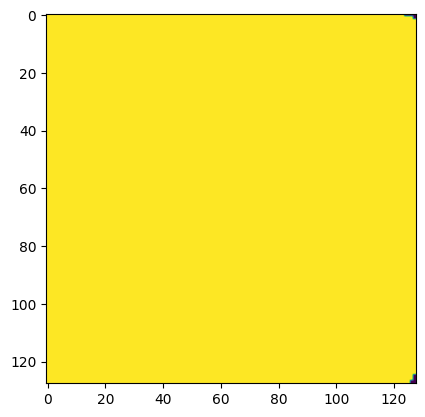

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
QTD Assinaturas ruidosas: 8


In [42]:
def classifica_e_limpa_imagens(dict_paths):
    cont = 0
    target_size = (128, 128)
    for folder in dict_paths.keys():
        for filename in os.listdir(folder):
            if filename.endswith('png'):
                original_img = Image.open(os.path.join(folder, filename)).convert('L')
                original_size = original_img.size
                original_img = resize_with_padding(original_img, target_size)
                img_array = img_to_array(original_img) / 255.0
                img_array = np.expand_dims(img_array, axis=0)

                ruidosa = verifica_necessidade_limpeza(clf_ruido, img_array)

                if ruidosa:
                    print(filename)
                    cont += 1
                    clean_img = limpador_ruidos.predict(img_array)
                    clean_img = (clean_img[0] * 255).astype(np.uint8)
                    plt.imshow(clean_img)
                    plt.show()
                    cv2.imwrite(os.path.join(dict_paths[folder], filename), clean_img)
                else:
                    cv2.imwrite(os.path.join(dict_paths[folder], filename), np.array(original_img))
    print(f"QTD Assinaturas ruidosas: {cont}")

classifica_e_limpa_imagens(dict_paths)

In [43]:
original_images = [os.path.join(output_original_path, f) for f in os.listdir(output_original_path) if f.endswith(".png")]
forged_images = [os.path.join(output_forged_path, f) for f in os.listdir(output_forged_path) if f.endswith(".png")]

def extract_id(filename):
    name = os.path.basename(filename)
    parts = name.split("_")
    if len(parts) < 3:
        return None
    if parts[0] in ["original", "forgeries", "originals"] and parts[1].isdigit():
        return int(parts[1])
    return None

original_labels = [extract_id(img) for img in original_images]
forged_labels = [extract_id(img) for img in forged_images]

In [44]:
pairs = []
pair_labels = []

label_to_originals = {}
for img, label in zip(original_images, original_labels):
    if label not in label_to_originals:
        label_to_originals[label] = []
    label_to_originals[label].append(img)

for label, imgs in label_to_originals.items():
    if len(imgs) > 1:
        for _ in range(len(imgs) // 2):
            img1, img2 = random.sample(imgs, 2)
            pairs.append((img1, img2))
            pair_labels.append(0)

label_to_forged = {}
for img, label in zip(forged_images, forged_labels):
    if label not in label_to_forged:
        label_to_forged[label] = []
    label_to_forged[label].append(img)

for label in label_to_originals.keys():
    originals = label_to_originals[label]
    forged = label_to_forged.get(label, [])
    if len(originals) > 0 and len(forged) > 0:
        for _ in range(min(len(originals), len(forged))):
            img1 = random.choice(originals)
            img2 = random.choice(forged)
            pairs.append((img1, img2))
            pair_labels.append(1)

pairs = np.array(pairs)
pair_labels = np.array(pair_labels)

print(f"Total de pares criados: {len(pairs)}")
print(f"Pares genuínos: {sum(pair_labels == 0)}")
print(f"Pares forjados: {sum(pair_labels == 1)}")


Total de pares criados: 1980
Pares genuínos: 660
Pares forjados: 1320


In [48]:
zip_pares = list(zip(pairs, pair_labels))
random.shuffle(zip_pares)
pairs, pair_labels = zip(*zip_pares)

print(pairs[0])
print(pair_labels[0])

for i in list(zip(pairs, pair_labels)):
    print(i)

['../dados/full_org_pre_proc/original_13_3.png'
 '../dados/full_forg_pre_proc/forgeries_13_23.png']
1
(array(['../dados/full_org_pre_proc/original_13_3.png',
       '../dados/full_forg_pre_proc/forgeries_13_23.png'], dtype='<U47'), np.int64(1))
(array(['../dados/full_org_pre_proc/original_42_21.png',
       '../dados/full_org_pre_proc/original_42_17.png'], dtype='<U47'), np.int64(0))
(array(['../dados/full_org_pre_proc/original_34_18.png',
       '../dados/full_forg_pre_proc/forgeries_34_5.png'], dtype='<U47'), np.int64(1))
(array(['../dados/full_org_pre_proc/original_6_1.png',
       '../dados/full_org_pre_proc/original_6_4.png'], dtype='<U47'), np.int64(0))
(array(['../dados/full_org_pre_proc/original_25_18.png',
       '../dados/full_forg_pre_proc/forgeries_25_6.png'], dtype='<U47'), np.int64(1))
(array(['../dados/full_org_pre_proc/original_8_24.png',
       '../dados/full_forg_pre_proc/forgeries_8_20.png'], dtype='<U47'), np.int64(1))
(array(['../dados/full_org_pre_proc/original_47

## Pipeline Resnet50 + SVM

In [60]:
class SignatureVerificationPipeline:
    def __init__(self, num_features=500, kernel="rbf", C=1.0):
        self.num_features = num_features
        self.kernel = kernel
        self.C = C
        self.feature_extractor = self._build_feature_extractor()
        self.classifier = SVC(kernel=self.kernel, C=self.C, probability=True)

    def _build_feature_extractor(self):
        base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
        x = GlobalAveragePooling2D()(base_model.output)
        x = Dense(self.num_features, activation="relu")(x)
        model = Model(inputs=base_model.input, outputs=x)
        return model

    def extract_features(self, img_path):
        img = image.load_img(img_path, target_size=(128, 128), color_mode="grayscale")
        img_array = image.img_to_array(img)
        img_array = np.repeat(img_array, 3, axis=-1)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        return self.feature_extractor.predict(img_array).flatten()

    def prepare_dataset(self, pairs, labels):
        X, y = [], []
        for (img1_path, img2_path), label in tqdm(zip(pairs, labels), total=len(pairs), desc="Extraindo Features"):
            feat1 = self.extract_features(img1_path)
            feat2 = self.extract_features(img2_path)
            feature_diff = np.abs(feat1 - feat2)
            X.append(feature_diff)
            y.append(label)
        return np.array(X), np.array(y)

    def train(self, X_train, y_train):
        self.classifier.fit(X_train, y_train)
        print("Modelo treinado com sucesso!")

    def metrics(self, X_test, y_test, threshold=0.5):
        y_pred = np.array([self.classifier.predict([X_test[i]])[0] for i in range(len(X_test))])
        y_probs = np.array([self.classifier.predict_proba([X_test[i]])[0][1] for i in range(len(X_test))])
        y_pred = (y_probs > threshold).astype(int)

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        labels = ["Genuína", "Forjada"]

        print(f"Acurácia: {acc:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"Recall: {recall:.4f}")

        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
        plt.xlabel("Predito")
        plt.ylabel("Real")
        plt.title("Matriz de Confusão")
        plt.show()

    def predict(self, img1_path, img2_path, threshold=0.5):
        feat1 = self.extract_features(img1_path)
        feat2 = self.extract_features(img2_path)
        feature_diff = np.abs(feat1 - feat2)
        prob = self.classifier.predict_proba([feature_diff])[0][1]
        prediction = 1 if prob > threshold else 0
        print(f"🔎 Probabilidade de ser forjada: {prob:.4f}")
        print(f"🔍 Resultado: {'Genuína ✅' if prediction == 0 else 'Forjada ❌'}")
        return prediction, prob

    def cross_validate(self, X, y, cv=10):
        skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
        acc_scores = cross_val_score(self.classifier, X, y, cv=skf, scoring="accuracy")
        f1_scores = cross_val_score(self.classifier, X, y, cv=skf, scoring="f1")
        recall_scores = cross_val_score(self.classifier, X, y, cv=skf, scoring="recall")
        precision = cross_val_score(self.classifier, X, y, cv=skf, scoring="precision")

        print(f"📊 Acurácia Média: {acc_scores.mean():.4f} ± {acc_scores.std():.4f}")
        print(f"📊 F1-score Médio: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")
        print(f"📊 Recall Médio: {recall_scores.mean():.4f} ± {recall_scores.std():.4f}")
        print(f"📊 Precision Médio: {precision.mean():.4f} ± {precision.std():.4f}")

        return acc_scores, f1_scores, recall_scores

    def save_pipeline(self, filename):
        joblib.dump({'feature_extractor': self.feature_extractor,
                     'classifier': self.classifier}, filename)
        print(f'pipeline salvo como {filename}')
        
    def optimize_hyperparameters(self, X, y, param_grid=None, cv=3):
        if param_grid is None:
            param_grid = {
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'rbf', 'poly']
            }
        grid = GridSearchCV(SVC(probability=True), param_grid, cv=cv)
        grid.fit(X, y)
        self.classifier = grid.best_estimator_
        print("🏁 Melhor modelo encontrado com GridSearchCV.")
        return grid.best_params_


In [61]:
pipeline = SignatureVerificationPipeline(num_features=500, kernel='rbf')

#pipeline.load_pipeline(os.path.join(os.path.dirname(os.getcwd()), 'modelos_treinados', 'SVM_assinaturas.pkl'))

In [62]:
X, y = pipeline.prepare_dataset(pairs, pair_labels)

Extraindo Features:   0%|                                                                     | 0/1980 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   0%|                                                             | 1/1980 [00:01<51:31,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:   0%|                                                             | 2/1980 [00:01<24:58,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:   0%|                                                             | 3/1980 [00:01<16:34,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:   0%|                                                             | 4/1980 [00:02<12:37,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   0%|▏                                                            | 5/1980 [00:02<10:24,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:   0%|▏                                                            | 6/1980 [00:02<09:04,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   0%|▏                                                            | 7/1980 [00:02<08:09,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   0%|▏                                                            | 8/1980 [00:02<07:31,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:   0%|▎                                                            | 9/1980 [00:03<07:09,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:   1%|▎                                                           | 10/1980 [00:03<06:59,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   1%|▎                                                           | 11/1980 [00:03<06:44,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:   1%|▎                                                           | 12/1980 [00:03<06:35,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:   1%|▍                                                           | 13/1980 [00:03<06:31,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   1%|▍                                                           | 14/1980 [00:04<06:26,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:   1%|▍                                                           | 15/1980 [00:04<06:28,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:   1%|▍                                                           | 16/1980 [00:04<06:26,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   1%|▌                                                           | 17/1980 [00:04<06:25,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   1%|▌                                                           | 18/1980 [00:04<06:22,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:   1%|▌                                                           | 19/1980 [00:05<06:20,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:   1%|▌                                                           | 20/1980 [00:05<06:17,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:   1%|▋                                                           | 21/1980 [00:05<06:17,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:   1%|▋                                                           | 22/1980 [00:05<06:17,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   1%|▋                                                           | 23/1980 [00:05<06:19,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   1%|▋                                                           | 24/1980 [00:06<06:16,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   1%|▊                                                           | 25/1980 [00:06<06:17,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   1%|▊                                                           | 26/1980 [00:06<06:14,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:   1%|▊                                                           | 27/1980 [00:06<06:12,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   1%|▊                                                           | 28/1980 [00:06<06:08,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   1%|▉                                                           | 29/1980 [00:06<06:05,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:   2%|▉                                                           | 30/1980 [00:07<06:04,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   2%|▉                                                           | 31/1980 [00:07<06:05,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   2%|▉                                                           | 32/1980 [00:07<06:02,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   2%|█                                                           | 33/1980 [00:07<06:02,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:   2%|█                                                           | 34/1980 [00:07<06:00,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   2%|█                                                           | 35/1980 [00:08<06:02,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   2%|█                                                           | 36/1980 [00:08<06:02,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   2%|█                                                           | 37/1980 [00:08<06:04,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:   2%|█▏                                                          | 38/1980 [00:08<06:06,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   2%|█▏                                                          | 39/1980 [00:08<06:04,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   2%|█▏                                                          | 40/1980 [00:09<06:04,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   2%|█▏                                                          | 41/1980 [00:09<06:03,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:   2%|█▎                                                          | 42/1980 [00:09<06:05,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:   2%|█▎                                                          | 43/1980 [00:09<06:05,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   2%|█▎                                                          | 44/1980 [00:09<06:01,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   2%|█▎                                                          | 45/1980 [00:09<06:01,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   2%|█▍                                                          | 46/1980 [00:10<05:59,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:   2%|█▍                                                          | 47/1980 [00:10<05:59,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   2%|█▍                                                          | 48/1980 [00:10<05:59,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   2%|█▍                                                          | 49/1980 [00:10<06:02,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   3%|█▌                                                          | 50/1980 [00:10<06:00,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extraindo Features:   3%|█▌                                                          | 51/1980 [00:11<05:57,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   3%|█▌                                                          | 52/1980 [00:11<05:55,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   3%|█▌                                                          | 53/1980 [00:11<05:55,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   3%|█▋                                                          | 54/1980 [00:11<05:55,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   3%|█▋                                                          | 55/1980 [00:11<05:57,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   3%|█▋                                                          | 56/1980 [00:11<05:56,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:   3%|█▋                                                          | 57/1980 [00:12<05:55,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   3%|█▊                                                          | 58/1980 [00:12<05:56,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   3%|█▊                                                          | 59/1980 [00:12<05:54,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   3%|█▊                                                          | 60/1980 [00:12<05:56,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:   3%|█▊                                                          | 61/1980 [00:12<05:59,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   3%|█▉                                                          | 62/1980 [00:13<05:58,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   3%|█▉                                                          | 63/1980 [00:13<05:57,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:   3%|█▉                                                          | 64/1980 [00:13<06:01,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   3%|█▉                                                          | 65/1980 [00:13<05:58,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   3%|██                                                          | 66/1980 [00:13<05:56,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:   3%|██                                                          | 67/1980 [00:14<05:56,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   3%|██                                                          | 68/1980 [00:14<05:55,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:   3%|██                                                          | 69/1980 [00:14<05:57,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:   4%|██                                                          | 70/1980 [00:14<06:00,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   4%|██▏                                                         | 71/1980 [00:14<06:02,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   4%|██▏                                                         | 72/1980 [00:14<05:59,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:   4%|██▏                                                         | 73/1980 [00:15<05:57,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   4%|██▏                                                         | 74/1980 [00:15<05:55,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:   4%|██▎                                                         | 75/1980 [00:15<05:56,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   4%|██▎                                                         | 76/1980 [00:15<05:59,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   4%|██▎                                                         | 77/1980 [00:15<05:56,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   4%|██▎                                                         | 78/1980 [00:16<05:56,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   4%|██▍                                                         | 79/1980 [00:16<05:57,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   4%|██▍                                                         | 80/1980 [00:16<05:54,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   4%|██▍                                                         | 81/1980 [00:16<05:57,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   4%|██▍                                                         | 82/1980 [00:16<05:54,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extraindo Features:   4%|██▌                                                         | 83/1980 [00:17<05:51,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   4%|██▌                                                         | 84/1980 [00:17<05:51,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   4%|██▌                                                         | 85/1980 [00:17<05:52,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   4%|██▌                                                         | 86/1980 [00:17<05:50,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   4%|██▋                                                         | 87/1980 [00:17<05:49,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   4%|██▋                                                         | 88/1980 [00:17<05:49,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:   4%|██▋                                                         | 89/1980 [00:18<05:50,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:   5%|██▋                                                         | 90/1980 [00:18<05:50,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   5%|██▊                                                         | 91/1980 [00:18<05:52,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:   5%|██▊                                                         | 92/1980 [00:18<05:53,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   5%|██▊                                                         | 93/1980 [00:18<05:52,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   5%|██▊                                                         | 94/1980 [00:19<05:48,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   5%|██▉                                                         | 95/1980 [00:19<05:49,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   5%|██▉                                                         | 96/1980 [00:19<05:49,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:   5%|██▉                                                         | 97/1980 [00:19<05:52,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   5%|██▉                                                         | 98/1980 [00:19<05:52,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extraindo Features:   5%|███                                                         | 99/1980 [00:20<05:49,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extraindo Features:   5%|██▉                                                        | 100/1980 [00:20<05:48,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   5%|███                                                        | 101/1980 [00:20<05:48,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:   5%|███                                                        | 102/1980 [00:20<05:50,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:   5%|███                                                        | 103/1980 [00:20<05:55,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   5%|███                                                        | 104/1980 [00:20<05:52,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   5%|███▏                                                       | 105/1980 [00:21<05:50,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   5%|███▏                                                       | 106/1980 [00:21<05:47,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   5%|███▏                                                       | 107/1980 [00:21<05:46,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   5%|███▏                                                       | 108/1980 [00:21<05:46,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:   6%|███▏                                                       | 109/1980 [00:21<05:46,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:   6%|███▎                                                       | 110/1980 [00:22<05:48,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   6%|███▎                                                       | 111/1980 [00:22<05:47,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   6%|███▎                                                       | 112/1980 [00:22<05:46,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   6%|███▎                                                       | 113/1980 [00:22<05:45,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   6%|███▍                                                       | 114/1980 [00:22<05:47,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extraindo Features:   6%|███▍                                                       | 115/1980 [00:22<05:45,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   6%|███▍                                                       | 116/1980 [00:23<05:44,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:   6%|███▍                                                       | 117/1980 [00:23<05:48,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   6%|███▌                                                       | 118/1980 [00:23<05:52,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:   6%|███▌                                                       | 119/1980 [00:23<05:51,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   6%|███▌                                                       | 120/1980 [00:23<05:50,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   6%|███▌                                                       | 121/1980 [00:24<05:48,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   6%|███▋                                                       | 122/1980 [00:24<05:46,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   6%|███▋                                                       | 123/1980 [00:24<05:46,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:   6%|███▋                                                       | 124/1980 [00:24<05:48,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   6%|███▋                                                       | 125/1980 [00:24<05:49,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   6%|███▊                                                       | 126/1980 [00:25<05:47,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   6%|███▊                                                       | 127/1980 [00:25<05:49,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   6%|███▊                                                       | 128/1980 [00:25<05:47,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extraindo Features:   7%|███▊                                                       | 129/1980 [00:25<05:57,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   7%|███▊                                                       | 130/1980 [00:25<06:08,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   7%|███▉                                                       | 131/1980 [00:26<05:59,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   7%|███▉                                                       | 132/1980 [00:26<05:54,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   7%|███▉                                                       | 133/1980 [00:26<05:52,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:   7%|███▉                                                       | 134/1980 [00:26<05:50,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   7%|████                                                       | 135/1980 [00:26<05:51,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:   7%|████                                                       | 136/1980 [00:26<05:47,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   7%|████                                                       | 137/1980 [00:27<05:45,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:   7%|████                                                       | 138/1980 [00:27<05:46,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:   7%|████▏                                                      | 139/1980 [00:27<05:47,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   7%|████▏                                                      | 140/1980 [00:27<05:44,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:   7%|████▏                                                      | 141/1980 [00:27<05:45,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Extraindo Features:   7%|████▏                                                      | 142/1980 [00:28<06:01,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   7%|████▎                                                      | 143/1980 [00:28<05:55,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   7%|████▎                                                      | 144/1980 [00:28<05:52,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:   7%|████▎                                                      | 145/1980 [00:28<05:51,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   7%|████▎                                                      | 146/1980 [00:28<05:48,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   7%|████▍                                                      | 147/1980 [00:29<05:45,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   7%|████▍                                                      | 148/1980 [00:29<05:45,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:   8%|████▍                                                      | 149/1980 [00:29<05:43,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   8%|████▍                                                      | 150/1980 [00:29<05:41,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   8%|████▍                                                      | 151/1980 [00:29<05:42,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   8%|████▌                                                      | 152/1980 [00:30<05:43,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   8%|████▌                                                      | 153/1980 [00:30<05:43,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:   8%|████▌                                                      | 154/1980 [00:30<05:44,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   8%|████▌                                                      | 155/1980 [00:30<05:44,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   8%|████▋                                                      | 156/1980 [00:30<05:45,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   8%|████▋                                                      | 157/1980 [00:30<05:42,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   8%|████▋                                                      | 158/1980 [00:31<05:39,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   8%|████▋                                                      | 159/1980 [00:31<05:39,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   8%|████▊                                                      | 160/1980 [00:31<05:37,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   8%|████▊                                                      | 161/1980 [00:31<05:39,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   8%|████▊                                                      | 162/1980 [00:31<05:38,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   8%|████▊                                                      | 163/1980 [00:32<05:40,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   8%|████▉                                                      | 164/1980 [00:32<05:39,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:   8%|████▉                                                      | 165/1980 [00:32<05:39,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   8%|████▉                                                      | 166/1980 [00:32<05:38,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:   8%|████▉                                                      | 167/1980 [00:32<05:40,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:   8%|█████                                                      | 168/1980 [00:33<05:40,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   9%|█████                                                      | 169/1980 [00:33<05:39,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   9%|█████                                                      | 170/1980 [00:33<05:38,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:   9%|█████                                                      | 171/1980 [00:33<05:38,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   9%|█████▏                                                     | 172/1980 [00:33<05:36,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   9%|█████▏                                                     | 173/1980 [00:33<05:37,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   9%|█████▏                                                     | 174/1980 [00:34<05:36,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   9%|█████▏                                                     | 175/1980 [00:34<05:37,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:   9%|█████▏                                                     | 176/1980 [00:34<05:40,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   9%|█████▎                                                     | 177/1980 [00:34<05:39,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:   9%|█████▎                                                     | 178/1980 [00:34<05:40,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   9%|█████▎                                                     | 179/1980 [00:35<05:37,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   9%|█████▎                                                     | 180/1980 [00:35<05:37,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:   9%|█████▍                                                     | 181/1980 [00:35<05:38,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:   9%|█████▍                                                     | 182/1980 [00:35<05:36,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   9%|█████▍                                                     | 183/1980 [00:35<05:35,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:   9%|█████▍                                                     | 184/1980 [00:36<05:35,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:   9%|█████▌                                                     | 185/1980 [00:36<05:36,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:   9%|█████▌                                                     | 186/1980 [00:36<05:34,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:   9%|█████▌                                                     | 187/1980 [00:36<05:36,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:   9%|█████▌                                                     | 188/1980 [00:36<05:37,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  10%|█████▋                                                     | 189/1980 [00:36<05:36,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  10%|█████▋                                                     | 190/1980 [00:37<05:35,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extraindo Features:  10%|█████▋                                                     | 191/1980 [00:37<05:32,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  10%|█████▋                                                     | 192/1980 [00:37<05:33,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  10%|█████▊                                                     | 193/1980 [00:37<05:35,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  10%|█████▊                                                     | 194/1980 [00:37<05:35,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  10%|█████▊                                                     | 195/1980 [00:38<05:33,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  10%|█████▊                                                     | 196/1980 [00:38<05:30,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  10%|█████▊                                                     | 197/1980 [00:38<05:29,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  10%|█████▉                                                     | 198/1980 [00:38<05:30,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  10%|█████▉                                                     | 199/1980 [00:38<05:33,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  10%|█████▉                                                     | 200/1980 [00:38<05:34,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  10%|█████▉                                                     | 201/1980 [00:39<05:32,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  10%|██████                                                     | 202/1980 [00:39<05:31,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  10%|██████                                                     | 203/1980 [00:39<05:32,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  10%|██████                                                     | 204/1980 [00:39<05:31,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  10%|██████                                                     | 205/1980 [00:39<05:32,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  10%|██████▏                                                    | 206/1980 [00:40<05:30,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  10%|██████▏                                                    | 207/1980 [00:40<05:30,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  11%|██████▏                                                    | 208/1980 [00:40<05:28,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  11%|██████▏                                                    | 209/1980 [00:40<05:29,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  11%|██████▎                                                    | 210/1980 [00:40<05:31,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  11%|██████▎                                                    | 211/1980 [00:41<05:31,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  11%|██████▎                                                    | 212/1980 [00:41<05:30,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  11%|██████▎                                                    | 213/1980 [00:41<05:30,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  11%|██████▍                                                    | 214/1980 [00:41<05:30,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  11%|██████▍                                                    | 215/1980 [00:41<05:29,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  11%|██████▍                                                    | 216/1980 [00:41<05:28,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  11%|██████▍                                                    | 217/1980 [00:42<05:30,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  11%|██████▍                                                    | 218/1980 [00:42<05:28,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  11%|██████▌                                                    | 219/1980 [00:42<05:28,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  11%|██████▌                                                    | 220/1980 [00:42<05:28,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  11%|██████▌                                                    | 221/1980 [00:42<05:30,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  11%|██████▌                                                    | 222/1980 [00:43<05:27,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  11%|██████▋                                                    | 223/1980 [00:43<05:27,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  11%|██████▋                                                    | 224/1980 [00:43<05:28,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  11%|██████▋                                                    | 225/1980 [00:43<05:28,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  11%|██████▋                                                    | 226/1980 [00:43<05:28,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  11%|██████▊                                                    | 227/1980 [00:44<05:27,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  12%|██████▊                                                    | 228/1980 [00:44<05:26,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  12%|██████▊                                                    | 229/1980 [00:44<05:25,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  12%|██████▊                                                    | 230/1980 [00:44<05:26,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  12%|██████▉                                                    | 231/1980 [00:44<05:38,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  12%|██████▉                                                    | 232/1980 [00:44<05:36,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  12%|██████▉                                                    | 233/1980 [00:45<05:33,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  12%|██████▉                                                    | 234/1980 [00:45<05:28,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  12%|███████                                                    | 235/1980 [00:45<05:29,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  12%|███████                                                    | 236/1980 [00:45<05:27,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  12%|███████                                                    | 237/1980 [00:45<05:28,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  12%|███████                                                    | 238/1980 [00:46<05:27,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  12%|███████                                                    | 239/1980 [00:46<05:25,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  12%|███████▏                                                   | 240/1980 [00:46<05:24,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  12%|███████▏                                                   | 241/1980 [00:46<05:25,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  12%|███████▏                                                   | 242/1980 [00:46<05:27,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  12%|███████▏                                                   | 243/1980 [00:47<05:25,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  12%|███████▎                                                   | 244/1980 [00:47<05:26,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  12%|███████▎                                                   | 245/1980 [00:47<05:24,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  12%|███████▎                                                   | 246/1980 [00:47<05:23,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  12%|███████▎                                                   | 247/1980 [00:47<05:24,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  13%|███████▍                                                   | 248/1980 [00:47<05:23,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  13%|███████▍                                                   | 249/1980 [00:48<05:26,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  13%|███████▍                                                   | 250/1980 [00:48<05:26,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  13%|███████▍                                                   | 251/1980 [00:48<05:25,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  13%|███████▌                                                   | 252/1980 [00:48<05:24,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  13%|███████▌                                                   | 253/1980 [00:48<05:25,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  13%|███████▌                                                   | 254/1980 [00:49<05:23,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  13%|███████▌                                                   | 255/1980 [00:49<05:22,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  13%|███████▋                                                   | 256/1980 [00:49<05:22,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  13%|███████▋                                                   | 257/1980 [00:49<05:24,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  13%|███████▋                                                   | 258/1980 [00:49<05:22,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  13%|███████▋                                                   | 259/1980 [00:50<05:22,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  13%|███████▋                                                   | 260/1980 [00:50<05:23,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  13%|███████▊                                                   | 261/1980 [00:50<05:22,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  13%|███████▊                                                   | 262/1980 [00:50<05:21,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  13%|███████▊                                                   | 263/1980 [00:50<05:21,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  13%|███████▊                                                   | 264/1980 [00:50<05:22,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  13%|███████▉                                                   | 265/1980 [00:51<05:22,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  13%|███████▉                                                   | 266/1980 [00:51<05:21,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  13%|███████▉                                                   | 267/1980 [00:51<05:19,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  14%|███████▉                                                   | 268/1980 [00:51<05:20,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  14%|████████                                                   | 269/1980 [00:51<05:18,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  14%|████████                                                   | 270/1980 [00:52<05:17,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  14%|████████                                                   | 271/1980 [00:52<05:17,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  14%|████████                                                   | 272/1980 [00:52<05:17,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  14%|████████▏                                                  | 273/1980 [00:52<05:21,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  14%|████████▏                                                  | 274/1980 [00:52<05:21,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  14%|████████▏                                                  | 275/1980 [00:53<05:21,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  14%|████████▏                                                  | 276/1980 [00:53<05:26,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  14%|████████▎                                                  | 277/1980 [00:53<05:31,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  14%|████████▎                                                  | 278/1980 [00:53<05:32,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  14%|████████▎                                                  | 279/1980 [00:53<05:32,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  14%|████████▎                                                  | 280/1980 [00:54<05:34,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  14%|████████▎                                                  | 281/1980 [00:54<05:33,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  14%|████████▍                                                  | 282/1980 [00:54<05:30,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  14%|████████▍                                                  | 283/1980 [00:54<05:29,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  14%|████████▍                                                  | 284/1980 [00:54<05:28,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  14%|████████▍                                                  | 285/1980 [00:55<05:26,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  14%|████████▌                                                  | 286/1980 [00:55<05:24,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  14%|████████▌                                                  | 287/1980 [00:55<05:23,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  15%|████████▌                                                  | 288/1980 [00:55<05:23,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  15%|████████▌                                                  | 289/1980 [00:55<05:25,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  15%|████████▋                                                  | 290/1980 [00:55<05:23,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  15%|████████▋                                                  | 291/1980 [00:56<05:22,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  15%|████████▋                                                  | 292/1980 [00:56<05:21,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  15%|████████▋                                                  | 293/1980 [00:56<05:21,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  15%|████████▊                                                  | 294/1980 [00:56<05:21,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  15%|████████▊                                                  | 295/1980 [00:56<05:25,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  15%|████████▊                                                  | 296/1980 [00:57<05:24,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  15%|████████▊                                                  | 297/1980 [00:57<05:23,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  15%|████████▉                                                  | 298/1980 [00:57<05:21,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  15%|████████▉                                                  | 299/1980 [00:57<05:19,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  15%|████████▉                                                  | 300/1980 [00:57<05:18,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  15%|████████▉                                                  | 301/1980 [00:58<05:19,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  15%|████████▉                                                  | 302/1980 [00:58<05:22,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  15%|█████████                                                  | 303/1980 [00:58<05:26,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  15%|█████████                                                  | 304/1980 [00:58<05:24,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  15%|█████████                                                  | 305/1980 [00:58<05:24,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  15%|█████████                                                  | 306/1980 [00:59<05:23,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  16%|█████████▏                                                 | 307/1980 [00:59<05:23,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  16%|█████████▏                                                 | 308/1980 [00:59<05:20,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  16%|█████████▏                                                 | 309/1980 [00:59<05:19,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  16%|█████████▏                                                 | 310/1980 [00:59<05:21,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  16%|█████████▎                                                 | 311/1980 [00:59<05:18,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  16%|█████████▎                                                 | 312/1980 [01:00<05:18,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  16%|█████████▎                                                 | 313/1980 [01:00<05:18,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  16%|█████████▎                                                 | 314/1980 [01:00<05:17,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  16%|█████████▍                                                 | 315/1980 [01:00<05:18,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  16%|█████████▍                                                 | 316/1980 [01:00<05:20,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  16%|█████████▍                                                 | 317/1980 [01:01<05:17,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  16%|█████████▍                                                 | 318/1980 [01:01<05:18,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  16%|█████████▌                                                 | 319/1980 [01:01<05:17,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  16%|█████████▌                                                 | 320/1980 [01:01<05:17,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  16%|█████████▌                                                 | 321/1980 [01:01<05:18,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  16%|█████████▌                                                 | 322/1980 [01:02<05:18,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  16%|█████████▌                                                 | 323/1980 [01:02<05:15,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  16%|█████████▋                                                 | 324/1980 [01:02<05:14,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  16%|█████████▋                                                 | 325/1980 [01:02<05:15,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  16%|█████████▋                                                 | 326/1980 [01:02<05:16,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  17%|█████████▋                                                 | 327/1980 [01:03<05:15,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  17%|█████████▊                                                 | 328/1980 [01:03<05:17,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  17%|█████████▊                                                 | 329/1980 [01:03<05:20,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  17%|█████████▊                                                 | 330/1980 [01:03<05:20,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  17%|█████████▊                                                 | 331/1980 [01:03<05:20,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  17%|█████████▉                                                 | 332/1980 [01:04<05:17,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  17%|█████████▉                                                 | 333/1980 [01:04<05:17,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  17%|█████████▉                                                 | 334/1980 [01:04<05:14,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  17%|█████████▉                                                 | 335/1980 [01:04<05:16,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  17%|██████████                                                 | 336/1980 [01:04<05:15,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  17%|██████████                                                 | 337/1980 [01:05<05:48,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  17%|██████████                                                 | 338/1980 [01:05<05:35,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  17%|██████████                                                 | 339/1980 [01:05<05:27,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  17%|██████████▏                                                | 340/1980 [01:05<05:21,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  17%|██████████▏                                                | 341/1980 [01:05<05:18,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  17%|██████████▏                                                | 342/1980 [01:05<05:18,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  17%|██████████▏                                                | 343/1980 [01:06<05:17,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  17%|██████████▎                                                | 344/1980 [01:06<05:16,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  17%|██████████▎                                                | 345/1980 [01:06<05:16,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  17%|██████████▎                                                | 346/1980 [01:06<05:15,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  18%|██████████▎                                                | 347/1980 [01:06<05:14,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  18%|██████████▎                                                | 348/1980 [01:07<05:12,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  18%|██████████▍                                                | 349/1980 [01:07<05:13,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  18%|██████████▍                                                | 350/1980 [01:07<05:10,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  18%|██████████▍                                                | 351/1980 [01:07<05:08,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  18%|██████████▍                                                | 352/1980 [01:07<05:09,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  18%|██████████▌                                                | 353/1980 [01:08<05:09,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  18%|██████████▌                                                | 354/1980 [01:08<05:07,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  18%|██████████▌                                                | 355/1980 [01:08<05:10,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  18%|██████████▌                                                | 356/1980 [01:08<05:08,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  18%|██████████▋                                                | 357/1980 [01:08<05:09,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  18%|██████████▋                                                | 358/1980 [01:09<05:10,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  18%|██████████▋                                                | 359/1980 [01:09<05:10,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  18%|██████████▋                                                | 360/1980 [01:09<05:12,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  18%|██████████▊                                                | 361/1980 [01:09<05:10,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  18%|██████████▊                                                | 362/1980 [01:09<05:09,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  18%|██████████▊                                                | 363/1980 [01:10<05:10,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  18%|██████████▊                                                | 364/1980 [01:10<05:08,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  18%|██████████▉                                                | 365/1980 [01:10<05:06,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  18%|██████████▉                                                | 366/1980 [01:10<05:06,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  19%|██████████▉                                                | 367/1980 [01:10<05:06,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  19%|██████████▉                                                | 368/1980 [01:10<05:10,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  19%|██████████▉                                                | 369/1980 [01:11<05:09,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  19%|███████████                                                | 370/1980 [01:11<05:06,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  19%|███████████                                                | 371/1980 [01:11<05:04,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  19%|███████████                                                | 372/1980 [01:11<05:04,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  19%|███████████                                                | 373/1980 [01:11<05:07,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  19%|███████████▏                                               | 374/1980 [01:12<05:08,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  19%|███████████▏                                               | 375/1980 [01:12<05:08,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  19%|███████████▏                                               | 376/1980 [01:12<05:07,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  19%|███████████▏                                               | 377/1980 [01:12<05:06,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  19%|███████████▎                                               | 378/1980 [01:12<05:06,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  19%|███████████▎                                               | 379/1980 [01:13<05:10,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  19%|███████████▎                                               | 380/1980 [01:13<05:08,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  19%|███████████▎                                               | 381/1980 [01:13<05:07,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  19%|███████████▍                                               | 382/1980 [01:13<05:04,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  19%|███████████▍                                               | 383/1980 [01:13<05:04,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  19%|███████████▍                                               | 384/1980 [01:14<05:06,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  19%|███████████▍                                               | 385/1980 [01:14<05:09,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  19%|███████████▌                                               | 386/1980 [01:14<05:06,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  20%|███████████▌                                               | 387/1980 [01:14<05:07,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  20%|███████████▌                                               | 388/1980 [01:14<05:05,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  20%|███████████▌                                               | 389/1980 [01:14<05:06,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  20%|███████████▌                                               | 390/1980 [01:15<05:05,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  20%|███████████▋                                               | 391/1980 [01:15<05:06,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  20%|███████████▋                                               | 392/1980 [01:15<05:06,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  20%|███████████▋                                               | 393/1980 [01:15<05:05,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  20%|███████████▋                                               | 394/1980 [01:15<05:03,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  20%|███████████▊                                               | 395/1980 [01:16<05:02,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  20%|███████████▊                                               | 396/1980 [01:16<05:02,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  20%|███████████▊                                               | 397/1980 [01:16<05:02,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  20%|███████████▊                                               | 398/1980 [01:16<05:02,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  20%|███████████▉                                               | 399/1980 [01:16<05:01,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  20%|███████████▉                                               | 400/1980 [01:17<05:01,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  20%|███████████▉                                               | 401/1980 [01:17<05:01,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  20%|███████████▉                                               | 402/1980 [01:17<04:59,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  20%|████████████                                               | 403/1980 [01:17<05:00,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  20%|████████████                                               | 404/1980 [01:17<04:58,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  20%|████████████                                               | 405/1980 [01:18<04:58,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  21%|████████████                                               | 406/1980 [01:18<04:58,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  21%|████████████▏                                              | 407/1980 [01:18<04:57,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  21%|████████████▏                                              | 408/1980 [01:18<05:02,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  21%|████████████▏                                              | 409/1980 [01:18<05:02,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  21%|████████████▏                                              | 410/1980 [01:19<05:02,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  21%|████████████▏                                              | 411/1980 [01:19<05:01,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  21%|████████████▎                                              | 412/1980 [01:19<04:59,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  21%|████████████▎                                              | 413/1980 [01:19<04:59,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  21%|████████████▎                                              | 414/1980 [01:19<04:58,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  21%|████████████▎                                              | 415/1980 [01:19<04:58,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  21%|████████████▍                                              | 416/1980 [01:20<04:59,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  21%|████████████▍                                              | 417/1980 [01:20<04:57,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  21%|████████████▍                                              | 418/1980 [01:20<04:56,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  21%|████████████▍                                              | 419/1980 [01:20<04:56,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  21%|████████████▌                                              | 420/1980 [01:20<04:57,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  21%|████████████▌                                              | 421/1980 [01:21<05:00,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  21%|████████████▌                                              | 422/1980 [01:21<04:59,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  21%|████████████▌                                              | 423/1980 [01:21<04:56,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  21%|████████████▋                                              | 424/1980 [01:21<04:57,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  21%|████████████▋                                              | 425/1980 [01:21<04:56,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  22%|████████████▋                                              | 426/1980 [01:22<04:55,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  22%|████████████▋                                              | 427/1980 [01:22<04:58,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  22%|████████████▊                                              | 428/1980 [01:22<04:56,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  22%|████████████▊                                              | 429/1980 [01:22<04:55,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  22%|████████████▊                                              | 430/1980 [01:22<04:54,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  22%|████████████▊                                              | 431/1980 [01:23<04:57,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  22%|████████████▊                                              | 432/1980 [01:23<04:59,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  22%|████████████▉                                              | 433/1980 [01:23<04:58,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  22%|████████████▉                                              | 434/1980 [01:23<04:59,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  22%|████████████▉                                              | 435/1980 [01:23<04:57,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  22%|████████████▉                                              | 436/1980 [01:23<04:57,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  22%|█████████████                                              | 437/1980 [01:24<04:57,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  22%|█████████████                                              | 438/1980 [01:24<04:55,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  22%|█████████████                                              | 439/1980 [01:24<04:54,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  22%|█████████████                                              | 440/1980 [01:24<04:54,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  22%|█████████████▏                                             | 441/1980 [01:24<04:52,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  22%|█████████████▏                                             | 442/1980 [01:25<04:52,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  22%|█████████████▏                                             | 443/1980 [01:25<04:53,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  22%|█████████████▏                                             | 444/1980 [01:25<04:52,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  22%|█████████████▎                                             | 445/1980 [01:25<04:53,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  23%|█████████████▎                                             | 446/1980 [01:25<04:53,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  23%|█████████████▎                                             | 447/1980 [01:26<04:53,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  23%|█████████████▎                                             | 448/1980 [01:26<04:53,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  23%|█████████████▍                                             | 449/1980 [01:26<04:52,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  23%|█████████████▍                                             | 450/1980 [01:26<04:51,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  23%|█████████████▍                                             | 451/1980 [01:26<04:52,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  23%|█████████████▍                                             | 452/1980 [01:27<04:50,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  23%|█████████████▍                                             | 453/1980 [01:27<04:51,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  23%|█████████████▌                                             | 454/1980 [01:27<04:51,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  23%|█████████████▌                                             | 455/1980 [01:27<04:49,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  23%|█████████████▌                                             | 456/1980 [01:27<04:49,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  23%|█████████████▌                                             | 457/1980 [01:27<04:50,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  23%|█████████████▋                                             | 458/1980 [01:28<04:49,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  23%|█████████████▋                                             | 459/1980 [01:28<04:50,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  23%|█████████████▋                                             | 460/1980 [01:28<04:51,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  23%|█████████████▋                                             | 461/1980 [01:28<04:52,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  23%|█████████████▊                                             | 462/1980 [01:28<04:51,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  23%|█████████████▊                                             | 463/1980 [01:29<04:55,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  23%|█████████████▊                                             | 464/1980 [01:29<04:53,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  23%|█████████████▊                                             | 465/1980 [01:29<04:51,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  24%|█████████████▉                                             | 466/1980 [01:29<04:51,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  24%|█████████████▉                                             | 467/1980 [01:29<04:49,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  24%|█████████████▉                                             | 468/1980 [01:30<04:49,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  24%|█████████████▉                                             | 469/1980 [01:30<04:49,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  24%|██████████████                                             | 470/1980 [01:30<04:48,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  24%|██████████████                                             | 471/1980 [01:30<04:48,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  24%|██████████████                                             | 472/1980 [01:30<04:50,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  24%|██████████████                                             | 473/1980 [01:31<04:50,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  24%|██████████████                                             | 474/1980 [01:31<04:51,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  24%|██████████████▏                                            | 475/1980 [01:31<04:50,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  24%|██████████████▏                                            | 476/1980 [01:31<04:48,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  24%|██████████████▏                                            | 477/1980 [01:31<04:51,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extraindo Features:  24%|██████████████▏                                            | 478/1980 [01:32<05:11,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  24%|██████████████▎                                            | 479/1980 [01:32<05:11,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  24%|██████████████▎                                            | 480/1980 [01:32<05:10,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  24%|██████████████▎                                            | 481/1980 [01:32<05:10,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  24%|██████████████▎                                            | 482/1980 [01:32<05:06,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  24%|██████████████▍                                            | 483/1980 [01:33<05:03,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extraindo Features:  24%|██████████████▍                                            | 484/1980 [01:33<05:13,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extraindo Features:  24%|██████████████▍                                            | 485/1980 [01:33<05:19,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extraindo Features:  25%|██████████████▍                                            | 486/1980 [01:33<05:18,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  25%|██████████████▌                                            | 487/1980 [01:33<05:19,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  25%|██████████████▌                                            | 488/1980 [01:34<05:13,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  25%|██████████████▌                                            | 489/1980 [01:34<05:11,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


Extraindo Features:  25%|██████████████▌                                            | 490/1980 [01:34<05:58,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  25%|██████████████▋                                            | 491/1980 [01:34<05:52,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  25%|██████████████▋                                            | 492/1980 [01:35<05:44,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  25%|██████████████▋                                            | 493/1980 [01:35<05:39,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  25%|██████████████▋                                            | 494/1980 [01:35<05:26,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  25%|██████████████▊                                            | 495/1980 [01:35<05:21,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extraindo Features:  25%|██████████████▊                                            | 496/1980 [01:36<05:36,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  25%|██████████████▊                                            | 497/1980 [01:36<05:38,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  25%|██████████████▊                                            | 498/1980 [01:36<05:28,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  25%|██████████████▊                                            | 499/1980 [01:36<05:17,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  25%|██████████████▉                                            | 500/1980 [01:36<05:16,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  25%|██████████████▉                                            | 501/1980 [01:37<05:13,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  25%|██████████████▉                                            | 502/1980 [01:37<05:19,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extraindo Features:  25%|██████████████▉                                            | 503/1980 [01:37<05:32,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  25%|███████████████                                            | 504/1980 [01:37<05:25,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extraindo Features:  26%|███████████████                                            | 505/1980 [01:37<05:23,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  26%|███████████████                                            | 506/1980 [01:38<05:22,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  26%|███████████████                                            | 507/1980 [01:38<05:22,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  26%|███████████████▏                                           | 508/1980 [01:38<05:20,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  26%|███████████████▏                                           | 509/1980 [01:38<05:14,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  26%|███████████████▏                                           | 510/1980 [01:39<05:18,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extraindo Features:  26%|███████████████▏                                           | 511/1980 [01:39<05:22,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  26%|███████████████▎                                           | 512/1980 [01:39<05:31,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  26%|███████████████▎                                           | 513/1980 [01:39<05:21,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  26%|███████████████▎                                           | 514/1980 [01:39<05:11,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  26%|███████████████▎                                           | 515/1980 [01:40<05:07,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  26%|███████████████▍                                           | 516/1980 [01:40<05:03,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  26%|███████████████▍                                           | 517/1980 [01:40<05:00,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  26%|███████████████▍                                           | 518/1980 [01:40<04:58,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  26%|███████████████▍                                           | 519/1980 [01:40<04:54,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  26%|███████████████▍                                           | 520/1980 [01:41<04:52,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  26%|███████████████▌                                           | 521/1980 [01:41<04:50,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  26%|███████████████▌                                           | 522/1980 [01:41<04:50,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  26%|███████████████▌                                           | 523/1980 [01:41<04:52,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  26%|███████████████▌                                           | 524/1980 [01:41<04:50,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  27%|███████████████▋                                           | 525/1980 [01:42<04:50,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  27%|███████████████▋                                           | 526/1980 [01:42<04:49,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  27%|███████████████▋                                           | 527/1980 [01:42<04:48,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  27%|███████████████▋                                           | 528/1980 [01:42<04:47,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  27%|███████████████▊                                           | 529/1980 [01:42<04:48,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  27%|███████████████▊                                           | 530/1980 [01:43<04:48,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  27%|███████████████▊                                           | 531/1980 [01:43<04:49,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  27%|███████████████▊                                           | 532/1980 [01:43<04:49,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  27%|███████████████▉                                           | 533/1980 [01:43<04:48,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  27%|███████████████▉                                           | 534/1980 [01:43<04:50,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  27%|███████████████▉                                           | 535/1980 [01:44<04:50,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  27%|███████████████▉                                           | 536/1980 [01:44<04:49,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  27%|████████████████                                           | 537/1980 [01:44<04:49,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  27%|████████████████                                           | 538/1980 [01:44<04:46,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  27%|████████████████                                           | 539/1980 [01:44<04:48,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  27%|████████████████                                           | 540/1980 [01:45<04:48,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  27%|████████████████                                           | 541/1980 [01:45<04:49,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  27%|████████████████▏                                          | 542/1980 [01:45<04:48,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  27%|████████████████▏                                          | 543/1980 [01:45<04:48,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  27%|████████████████▏                                          | 544/1980 [01:45<04:51,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  28%|████████████████▏                                          | 545/1980 [01:46<04:50,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  28%|████████████████▎                                          | 546/1980 [01:46<04:50,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  28%|████████████████▎                                          | 547/1980 [01:46<04:48,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  28%|████████████████▎                                          | 548/1980 [01:46<04:46,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  28%|████████████████▎                                          | 549/1980 [01:46<04:46,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  28%|████████████████▍                                          | 550/1980 [01:47<04:44,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  28%|████████████████▍                                          | 551/1980 [01:47<04:46,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  28%|████████████████▍                                          | 552/1980 [01:47<04:45,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  28%|████████████████▍                                          | 553/1980 [01:47<04:45,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  28%|████████████████▌                                          | 554/1980 [01:47<04:45,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  28%|████████████████▌                                          | 555/1980 [01:48<04:44,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  28%|████████████████▌                                          | 556/1980 [01:48<04:44,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  28%|████████████████▌                                          | 557/1980 [01:48<04:42,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  28%|████████████████▋                                          | 558/1980 [01:48<04:42,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  28%|████████████████▋                                          | 559/1980 [01:48<04:42,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  28%|████████████████▋                                          | 560/1980 [01:49<04:42,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  28%|████████████████▋                                          | 561/1980 [01:49<04:42,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  28%|████████████████▋                                          | 562/1980 [01:49<04:41,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  28%|████████████████▊                                          | 563/1980 [01:49<04:47,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extraindo Features:  28%|████████████████▊                                          | 564/1980 [01:49<05:03,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  29%|████████████████▊                                          | 565/1980 [01:50<04:58,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  29%|████████████████▊                                          | 566/1980 [01:50<04:54,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  29%|████████████████▉                                          | 567/1980 [01:50<04:49,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  29%|████████████████▉                                          | 568/1980 [01:50<04:44,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  29%|████████████████▉                                          | 569/1980 [01:50<04:44,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  29%|████████████████▉                                          | 570/1980 [01:51<04:42,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  29%|█████████████████                                          | 571/1980 [01:51<04:43,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  29%|█████████████████                                          | 572/1980 [01:51<04:43,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  29%|█████████████████                                          | 573/1980 [01:51<04:45,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  29%|█████████████████                                          | 574/1980 [01:51<04:45,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  29%|█████████████████▏                                         | 575/1980 [01:52<04:47,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  29%|█████████████████▏                                         | 576/1980 [01:52<04:47,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  29%|█████████████████▏                                         | 577/1980 [01:52<04:46,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  29%|█████████████████▏                                         | 578/1980 [01:52<04:44,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  29%|█████████████████▎                                         | 579/1980 [01:52<04:42,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  29%|█████████████████▎                                         | 580/1980 [01:53<04:39,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  29%|█████████████████▎                                         | 581/1980 [01:53<04:39,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  29%|█████████████████▎                                         | 582/1980 [01:53<04:39,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  29%|█████████████████▎                                         | 583/1980 [01:53<04:39,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  29%|█████████████████▍                                         | 584/1980 [01:53<04:42,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  30%|█████████████████▍                                         | 585/1980 [01:54<04:39,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  30%|█████████████████▍                                         | 586/1980 [01:54<04:37,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  30%|█████████████████▍                                         | 587/1980 [01:54<04:35,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  30%|█████████████████▌                                         | 588/1980 [01:54<04:34,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  30%|█████████████████▌                                         | 589/1980 [01:54<04:37,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  30%|█████████████████▌                                         | 590/1980 [01:55<04:34,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  30%|█████████████████▌                                         | 591/1980 [01:55<04:34,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  30%|█████████████████▋                                         | 592/1980 [01:55<04:34,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  30%|█████████████████▋                                         | 593/1980 [01:55<04:34,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  30%|█████████████████▋                                         | 594/1980 [01:55<04:35,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  30%|█████████████████▋                                         | 595/1980 [01:56<04:37,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  30%|█████████████████▊                                         | 596/1980 [01:56<04:38,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  30%|█████████████████▊                                         | 597/1980 [01:56<04:39,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  30%|█████████████████▊                                         | 598/1980 [01:56<04:41,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  30%|█████████████████▊                                         | 599/1980 [01:56<04:39,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  30%|█████████████████▉                                         | 600/1980 [01:57<04:42,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  30%|█████████████████▉                                         | 601/1980 [01:57<04:42,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  30%|█████████████████▉                                         | 602/1980 [01:57<04:39,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  30%|█████████████████▉                                         | 603/1980 [01:57<04:37,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  31%|█████████████████▉                                         | 604/1980 [01:57<04:35,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  31%|██████████████████                                         | 605/1980 [01:58<04:35,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  31%|██████████████████                                         | 606/1980 [01:58<04:34,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  31%|██████████████████                                         | 607/1980 [01:58<04:36,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  31%|██████████████████                                         | 608/1980 [01:58<04:38,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  31%|██████████████████▏                                        | 609/1980 [01:59<04:39,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  31%|██████████████████▏                                        | 610/1980 [01:59<04:37,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  31%|██████████████████▏                                        | 611/1980 [01:59<04:37,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  31%|██████████████████▏                                        | 612/1980 [01:59<04:36,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  31%|██████████████████▎                                        | 613/1980 [01:59<04:37,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  31%|██████████████████▎                                        | 614/1980 [02:00<04:34,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  31%|██████████████████▎                                        | 615/1980 [02:00<04:34,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  31%|██████████████████▎                                        | 616/1980 [02:00<04:33,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  31%|██████████████████▍                                        | 617/1980 [02:00<04:31,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  31%|██████████████████▍                                        | 618/1980 [02:00<04:31,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  31%|██████████████████▍                                        | 619/1980 [02:01<04:31,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  31%|██████████████████▍                                        | 620/1980 [02:01<04:31,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  31%|██████████████████▌                                        | 621/1980 [02:01<04:32,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  31%|██████████████████▌                                        | 622/1980 [02:01<04:31,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  31%|██████████████████▌                                        | 623/1980 [02:01<04:30,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  32%|██████████████████▌                                        | 624/1980 [02:02<04:32,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  32%|██████████████████▌                                        | 625/1980 [02:02<04:31,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  32%|██████████████████▋                                        | 626/1980 [02:02<04:28,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  32%|██████████████████▋                                        | 627/1980 [02:02<04:28,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  32%|██████████████████▋                                        | 628/1980 [02:02<04:28,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  32%|██████████████████▋                                        | 629/1980 [02:03<04:27,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  32%|██████████████████▊                                        | 630/1980 [02:03<04:27,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  32%|██████████████████▊                                        | 631/1980 [02:03<04:30,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  32%|██████████████████▊                                        | 632/1980 [02:03<04:31,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  32%|██████████████████▊                                        | 633/1980 [02:03<04:30,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  32%|██████████████████▉                                        | 634/1980 [02:04<04:29,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  32%|██████████████████▉                                        | 635/1980 [02:04<04:31,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  32%|██████████████████▉                                        | 636/1980 [02:04<04:30,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  32%|██████████████████▉                                        | 637/1980 [02:04<04:30,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  32%|███████████████████                                        | 638/1980 [02:04<04:29,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  32%|███████████████████                                        | 639/1980 [02:05<04:31,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  32%|███████████████████                                        | 640/1980 [02:05<04:29,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  32%|███████████████████                                        | 641/1980 [02:05<04:27,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  32%|███████████████████▏                                       | 642/1980 [02:05<04:27,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  32%|███████████████████▏                                       | 643/1980 [02:05<04:27,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  33%|███████████████████▏                                       | 644/1980 [02:06<04:28,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  33%|███████████████████▏                                       | 645/1980 [02:06<04:26,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  33%|███████████████████▏                                       | 646/1980 [02:06<04:26,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  33%|███████████████████▎                                       | 647/1980 [02:06<04:27,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  33%|███████████████████▎                                       | 648/1980 [02:06<04:27,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  33%|███████████████████▎                                       | 649/1980 [02:07<04:26,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  33%|███████████████████▎                                       | 650/1980 [02:07<04:24,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  33%|███████████████████▍                                       | 651/1980 [02:07<04:28,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  33%|███████████████████▍                                       | 652/1980 [02:07<04:28,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  33%|███████████████████▍                                       | 653/1980 [02:07<04:25,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  33%|███████████████████▍                                       | 654/1980 [02:08<04:23,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  33%|███████████████████▌                                       | 655/1980 [02:08<04:24,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  33%|███████████████████▌                                       | 656/1980 [02:08<04:24,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  33%|███████████████████▌                                       | 657/1980 [02:08<04:23,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  33%|███████████████████▌                                       | 658/1980 [02:08<04:23,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  33%|███████████████████▋                                       | 659/1980 [02:09<04:22,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  33%|███████████████████▋                                       | 660/1980 [02:09<04:23,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  33%|███████████████████▋                                       | 661/1980 [02:09<04:25,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  33%|███████████████████▋                                       | 662/1980 [02:09<04:25,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  33%|███████████████████▊                                       | 663/1980 [02:09<04:24,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  34%|███████████████████▊                                       | 664/1980 [02:10<04:22,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  34%|███████████████████▊                                       | 665/1980 [02:10<04:22,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  34%|███████████████████▊                                       | 666/1980 [02:10<04:21,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  34%|███████████████████▉                                       | 667/1980 [02:10<04:21,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  34%|███████████████████▉                                       | 668/1980 [02:10<04:21,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  34%|███████████████████▉                                       | 669/1980 [02:11<04:22,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  34%|███████████████████▉                                       | 670/1980 [02:11<04:21,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  34%|███████████████████▉                                       | 671/1980 [02:11<04:21,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  34%|████████████████████                                       | 672/1980 [02:11<04:20,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  34%|████████████████████                                       | 673/1980 [02:11<04:19,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  34%|████████████████████                                       | 674/1980 [02:12<04:20,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  34%|████████████████████                                       | 675/1980 [02:12<04:20,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  34%|████████████████████▏                                      | 676/1980 [02:12<04:18,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  34%|████████████████████▏                                      | 677/1980 [02:12<04:17,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  34%|████████████████████▏                                      | 678/1980 [02:12<04:17,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  34%|████████████████████▏                                      | 679/1980 [02:13<04:18,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  34%|████████████████████▎                                      | 680/1980 [02:13<04:17,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  34%|████████████████████▎                                      | 681/1980 [02:13<04:20,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  34%|████████████████████▎                                      | 682/1980 [02:13<04:21,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  34%|████████████████████▎                                      | 683/1980 [02:13<04:19,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  35%|████████████████████▍                                      | 684/1980 [02:14<04:19,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  35%|████████████████████▍                                      | 685/1980 [02:14<04:19,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  35%|████████████████████▍                                      | 686/1980 [02:14<04:18,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  35%|████████████████████▍                                      | 687/1980 [02:14<04:19,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  35%|████████████████████▌                                      | 688/1980 [02:14<04:19,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  35%|████████████████████▌                                      | 689/1980 [02:15<04:19,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  35%|████████████████████▌                                      | 690/1980 [02:15<04:18,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  35%|████████████████████▌                                      | 691/1980 [02:15<04:19,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  35%|████████████████████▌                                      | 692/1980 [02:15<04:18,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  35%|████████████████████▋                                      | 693/1980 [02:15<04:16,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  35%|████████████████████▋                                      | 694/1980 [02:16<04:17,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  35%|████████████████████▋                                      | 695/1980 [02:16<04:16,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  35%|████████████████████▋                                      | 696/1980 [02:16<04:17,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  35%|████████████████████▊                                      | 697/1980 [02:16<04:18,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  35%|████████████████████▊                                      | 698/1980 [02:16<04:16,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  35%|████████████████████▊                                      | 699/1980 [02:17<04:16,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  35%|████████████████████▊                                      | 700/1980 [02:17<04:16,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  35%|████████████████████▉                                      | 701/1980 [02:17<04:18,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  35%|████████████████████▉                                      | 702/1980 [02:17<04:18,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  36%|████████████████████▉                                      | 703/1980 [02:17<04:15,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  36%|████████████████████▉                                      | 704/1980 [02:18<04:17,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  36%|█████████████████████                                      | 705/1980 [02:18<04:15,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  36%|█████████████████████                                      | 706/1980 [02:18<04:13,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  36%|█████████████████████                                      | 707/1980 [02:18<04:11,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  36%|█████████████████████                                      | 708/1980 [02:18<04:11,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  36%|█████████████████████▏                                     | 709/1980 [02:19<04:12,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  36%|█████████████████████▏                                     | 710/1980 [02:19<04:11,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  36%|█████████████████████▏                                     | 711/1980 [02:19<04:13,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  36%|█████████████████████▏                                     | 712/1980 [02:19<04:14,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  36%|█████████████████████▏                                     | 713/1980 [02:19<04:12,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  36%|█████████████████████▎                                     | 714/1980 [02:20<04:12,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  36%|█████████████████████▎                                     | 715/1980 [02:20<04:14,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  36%|█████████████████████▎                                     | 716/1980 [02:20<04:12,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  36%|█████████████████████▎                                     | 717/1980 [02:20<04:11,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  36%|█████████████████████▍                                     | 718/1980 [02:20<04:10,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  36%|█████████████████████▍                                     | 719/1980 [02:21<04:10,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  36%|█████████████████████▍                                     | 720/1980 [02:21<04:12,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  36%|█████████████████████▍                                     | 721/1980 [02:21<04:15,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  36%|█████████████████████▌                                     | 722/1980 [02:21<04:13,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  37%|█████████████████████▌                                     | 723/1980 [02:21<04:12,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  37%|█████████████████████▌                                     | 724/1980 [02:22<04:38,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  37%|█████████████████████▌                                     | 725/1980 [02:22<04:29,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  37%|█████████████████████▋                                     | 726/1980 [02:22<04:24,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  37%|█████████████████████▋                                     | 727/1980 [02:22<04:22,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  37%|█████████████████████▋                                     | 728/1980 [02:22<04:17,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  37%|█████████████████████▋                                     | 729/1980 [02:23<04:15,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  37%|█████████████████████▊                                     | 730/1980 [02:23<04:13,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  37%|█████████████████████▊                                     | 731/1980 [02:23<04:14,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  37%|█████████████████████▊                                     | 732/1980 [02:23<04:22,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  37%|█████████████████████▊                                     | 733/1980 [02:23<04:18,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  37%|█████████████████████▊                                     | 734/1980 [02:24<04:16,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  37%|█████████████████████▉                                     | 735/1980 [02:24<04:13,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  37%|█████████████████████▉                                     | 736/1980 [02:24<04:11,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  37%|█████████████████████▉                                     | 737/1980 [02:24<04:10,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  37%|█████████████████████▉                                     | 738/1980 [02:24<04:10,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  37%|██████████████████████                                     | 739/1980 [02:25<04:10,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  37%|██████████████████████                                     | 740/1980 [02:25<04:10,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  37%|██████████████████████                                     | 741/1980 [02:25<04:10,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extraindo Features:  37%|██████████████████████                                     | 742/1980 [02:25<04:22,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  38%|██████████████████████▏                                    | 743/1980 [02:25<04:20,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  38%|██████████████████████▏                                    | 744/1980 [02:26<04:15,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  38%|██████████████████████▏                                    | 745/1980 [02:26<04:12,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  38%|██████████████████████▏                                    | 746/1980 [02:26<04:11,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  38%|██████████████████████▎                                    | 747/1980 [02:26<04:11,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  38%|██████████████████████▎                                    | 748/1980 [02:26<04:10,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  38%|██████████████████████▎                                    | 749/1980 [02:27<04:08,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  38%|██████████████████████▎                                    | 750/1980 [02:27<04:10,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  38%|██████████████████████▍                                    | 751/1980 [02:27<04:11,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  38%|██████████████████████▍                                    | 752/1980 [02:27<04:09,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  38%|██████████████████████▍                                    | 753/1980 [02:27<04:07,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  38%|██████████████████████▍                                    | 754/1980 [02:28<04:05,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  38%|██████████████████████▍                                    | 755/1980 [02:28<04:05,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  38%|██████████████████████▌                                    | 756/1980 [02:28<04:04,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  38%|██████████████████████▌                                    | 757/1980 [02:28<04:05,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  38%|██████████████████████▌                                    | 758/1980 [02:28<04:04,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  38%|██████████████████████▌                                    | 759/1980 [02:29<04:09,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  38%|██████████████████████▋                                    | 760/1980 [02:29<04:08,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  38%|██████████████████████▋                                    | 761/1980 [02:29<04:06,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  38%|██████████████████████▋                                    | 762/1980 [02:29<04:05,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  39%|██████████████████████▋                                    | 763/1980 [02:30<04:05,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  39%|██████████████████████▊                                    | 764/1980 [02:30<04:03,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  39%|██████████████████████▊                                    | 765/1980 [02:30<04:03,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  39%|██████████████████████▊                                    | 766/1980 [02:30<04:02,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  39%|██████████████████████▊                                    | 767/1980 [02:30<04:02,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  39%|██████████████████████▉                                    | 768/1980 [02:31<04:01,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  39%|██████████████████████▉                                    | 769/1980 [02:31<04:01,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  39%|██████████████████████▉                                    | 770/1980 [02:31<04:01,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  39%|██████████████████████▉                                    | 771/1980 [02:31<04:01,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  39%|███████████████████████                                    | 772/1980 [02:31<04:02,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  39%|███████████████████████                                    | 773/1980 [02:31<04:00,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  39%|███████████████████████                                    | 774/1980 [02:32<04:00,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  39%|███████████████████████                                    | 775/1980 [02:32<04:01,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  39%|███████████████████████                                    | 776/1980 [02:32<04:00,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  39%|███████████████████████▏                                   | 777/1980 [02:32<03:59,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  39%|███████████████████████▏                                   | 778/1980 [02:32<03:59,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  39%|███████████████████████▏                                   | 779/1980 [02:33<04:00,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  39%|███████████████████████▏                                   | 780/1980 [02:33<04:00,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  39%|███████████████████████▎                                   | 781/1980 [02:33<04:01,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  39%|███████████████████████▎                                   | 782/1980 [02:33<04:03,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  40%|███████████████████████▎                                   | 783/1980 [02:34<04:03,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  40%|███████████████████████▎                                   | 784/1980 [02:34<04:01,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  40%|███████████████████████▍                                   | 785/1980 [02:34<04:00,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  40%|███████████████████████▍                                   | 786/1980 [02:34<03:59,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  40%|███████████████████████▍                                   | 787/1980 [02:34<04:00,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  40%|███████████████████████▍                                   | 788/1980 [02:35<04:01,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  40%|███████████████████████▌                                   | 789/1980 [02:35<04:00,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  40%|███████████████████████▌                                   | 790/1980 [02:35<03:59,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  40%|███████████████████████▌                                   | 791/1980 [02:35<04:00,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  40%|███████████████████████▌                                   | 792/1980 [02:35<03:58,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  40%|███████████████████████▋                                   | 793/1980 [02:36<04:00,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  40%|███████████████████████▋                                   | 794/1980 [02:36<03:57,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  40%|███████████████████████▋                                   | 795/1980 [02:36<03:59,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  40%|███████████████████████▋                                   | 796/1980 [02:36<03:58,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  40%|███████████████████████▋                                   | 797/1980 [02:36<03:57,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  40%|███████████████████████▊                                   | 798/1980 [02:37<03:57,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  40%|███████████████████████▊                                   | 799/1980 [02:37<03:57,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  40%|███████████████████████▊                                   | 800/1980 [02:37<03:56,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  40%|███████████████████████▊                                   | 801/1980 [02:37<03:57,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  41%|███████████████████████▉                                   | 802/1980 [02:37<03:56,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  41%|███████████████████████▉                                   | 803/1980 [02:38<03:56,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  41%|███████████████████████▉                                   | 804/1980 [02:38<03:56,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  41%|███████████████████████▉                                   | 805/1980 [02:38<03:56,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  41%|████████████████████████                                   | 806/1980 [02:38<03:56,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  41%|████████████████████████                                   | 807/1980 [02:38<03:53,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  41%|████████████████████████                                   | 808/1980 [02:39<03:54,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  41%|████████████████████████                                   | 809/1980 [02:39<03:53,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  41%|████████████████████████▏                                  | 810/1980 [02:39<03:53,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  41%|████████████████████████▏                                  | 811/1980 [02:39<03:55,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  41%|████████████████████████▏                                  | 812/1980 [02:39<03:53,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  41%|████████████████████████▏                                  | 813/1980 [02:40<03:53,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  41%|████████████████████████▎                                  | 814/1980 [02:40<03:52,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  41%|████████████████████████▎                                  | 815/1980 [02:40<03:52,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  41%|████████████████████████▎                                  | 816/1980 [02:40<03:53,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  41%|████████████████████████▎                                  | 817/1980 [02:40<03:52,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  41%|████████████████████████▎                                  | 818/1980 [02:41<03:52,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  41%|████████████████████████▍                                  | 819/1980 [02:41<03:51,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  41%|████████████████████████▍                                  | 820/1980 [02:41<03:51,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  41%|████████████████████████▍                                  | 821/1980 [02:41<03:53,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  42%|████████████████████████▍                                  | 822/1980 [02:41<03:51,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  42%|████████████████████████▌                                  | 823/1980 [02:42<03:51,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extraindo Features:  42%|████████████████████████▌                                  | 824/1980 [02:42<04:08,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  42%|████████████████████████▌                                  | 825/1980 [02:42<04:09,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  42%|████████████████████████▌                                  | 826/1980 [02:42<04:01,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  42%|████████████████████████▋                                  | 827/1980 [02:42<03:57,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  42%|████████████████████████▋                                  | 828/1980 [02:43<03:56,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  42%|████████████████████████▋                                  | 829/1980 [02:43<03:56,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  42%|████████████████████████▋                                  | 830/1980 [02:43<03:54,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  42%|████████████████████████▊                                  | 831/1980 [02:43<03:55,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  42%|████████████████████████▊                                  | 832/1980 [02:43<03:52,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  42%|████████████████████████▊                                  | 833/1980 [02:44<03:51,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  42%|████████████████████████▊                                  | 834/1980 [02:44<03:50,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  42%|████████████████████████▉                                  | 835/1980 [02:44<03:50,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  42%|████████████████████████▉                                  | 836/1980 [02:44<03:50,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  42%|████████████████████████▉                                  | 837/1980 [02:44<03:48,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  42%|████████████████████████▉                                  | 838/1980 [02:45<03:47,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  42%|█████████████████████████                                  | 839/1980 [02:45<03:47,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  42%|█████████████████████████                                  | 840/1980 [02:45<03:48,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  42%|█████████████████████████                                  | 841/1980 [02:45<03:50,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  43%|█████████████████████████                                  | 842/1980 [02:45<03:48,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  43%|█████████████████████████                                  | 843/1980 [02:46<03:48,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  43%|█████████████████████████▏                                 | 844/1980 [02:46<03:48,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  43%|█████████████████████████▏                                 | 845/1980 [02:46<03:48,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  43%|█████████████████████████▏                                 | 846/1980 [02:46<03:49,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  43%|█████████████████████████▏                                 | 847/1980 [02:46<03:48,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  43%|█████████████████████████▎                                 | 848/1980 [02:47<03:47,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  43%|█████████████████████████▎                                 | 849/1980 [02:47<03:46,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  43%|█████████████████████████▎                                 | 850/1980 [02:47<03:47,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  43%|█████████████████████████▎                                 | 851/1980 [02:47<03:49,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  43%|█████████████████████████▍                                 | 852/1980 [02:47<03:47,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  43%|█████████████████████████▍                                 | 853/1980 [02:48<03:47,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  43%|█████████████████████████▍                                 | 854/1980 [02:48<03:46,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  43%|█████████████████████████▍                                 | 855/1980 [02:48<03:46,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  43%|█████████████████████████▌                                 | 856/1980 [02:48<03:47,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  43%|█████████████████████████▌                                 | 857/1980 [02:48<03:45,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  43%|█████████████████████████▌                                 | 858/1980 [02:49<03:45,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  43%|█████████████████████████▌                                 | 859/1980 [02:49<03:44,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  43%|█████████████████████████▋                                 | 860/1980 [02:49<03:45,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  43%|█████████████████████████▋                                 | 861/1980 [02:49<03:44,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  44%|█████████████████████████▋                                 | 862/1980 [02:49<03:44,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  44%|█████████████████████████▋                                 | 863/1980 [02:50<03:43,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  44%|█████████████████████████▋                                 | 864/1980 [02:50<03:43,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  44%|█████████████████████████▊                                 | 865/1980 [02:50<03:43,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  44%|█████████████████████████▊                                 | 866/1980 [02:50<03:43,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  44%|█████████████████████████▊                                 | 867/1980 [02:50<03:41,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  44%|█████████████████████████▊                                 | 868/1980 [02:51<03:42,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  44%|█████████████████████████▉                                 | 869/1980 [02:51<03:40,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  44%|█████████████████████████▉                                 | 870/1980 [02:51<03:40,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  44%|█████████████████████████▉                                 | 871/1980 [02:51<03:42,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  44%|█████████████████████████▉                                 | 872/1980 [02:51<03:41,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  44%|██████████████████████████                                 | 873/1980 [02:52<03:40,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  44%|██████████████████████████                                 | 874/1980 [02:52<03:41,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  44%|██████████████████████████                                 | 875/1980 [02:52<03:39,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  44%|██████████████████████████                                 | 876/1980 [02:52<03:40,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  44%|██████████████████████████▏                                | 877/1980 [02:52<03:41,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  44%|██████████████████████████▏                                | 878/1980 [02:53<03:40,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  44%|██████████████████████████▏                                | 879/1980 [02:53<03:42,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  44%|██████████████████████████▏                                | 880/1980 [02:53<03:40,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  44%|██████████████████████████▎                                | 881/1980 [02:53<03:41,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  45%|██████████████████████████▎                                | 882/1980 [02:53<03:40,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  45%|██████████████████████████▎                                | 883/1980 [02:54<03:40,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  45%|██████████████████████████▎                                | 884/1980 [02:54<03:39,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  45%|██████████████████████████▎                                | 885/1980 [02:54<03:38,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  45%|██████████████████████████▍                                | 886/1980 [02:54<03:40,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Extraindo Features:  45%|██████████████████████████▍                                | 887/1980 [02:55<04:05,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  45%|██████████████████████████▍                                | 888/1980 [02:55<03:55,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  45%|██████████████████████████▍                                | 889/1980 [02:55<03:52,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  45%|██████████████████████████▌                                | 890/1980 [02:55<03:50,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  45%|██████████████████████████▌                                | 891/1980 [02:55<03:45,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  45%|██████████████████████████▌                                | 892/1980 [02:56<03:41,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  45%|██████████████████████████▌                                | 893/1980 [02:56<03:39,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  45%|██████████████████████████▋                                | 894/1980 [02:56<03:37,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  45%|██████████████████████████▋                                | 895/1980 [02:56<03:37,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  45%|██████████████████████████▋                                | 896/1980 [02:56<03:38,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  45%|██████████████████████████▋                                | 897/1980 [02:57<03:36,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  45%|██████████████████████████▊                                | 898/1980 [02:57<03:35,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  45%|██████████████████████████▊                                | 899/1980 [02:57<03:35,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  45%|██████████████████████████▊                                | 900/1980 [02:57<03:34,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  46%|██████████████████████████▊                                | 901/1980 [02:57<03:35,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  46%|██████████████████████████▉                                | 902/1980 [02:58<03:34,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  46%|██████████████████████████▉                                | 903/1980 [02:58<03:34,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  46%|██████████████████████████▉                                | 904/1980 [02:58<03:32,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  46%|██████████████████████████▉                                | 905/1980 [02:58<03:31,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  46%|██████████████████████████▉                                | 906/1980 [02:58<03:31,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  46%|███████████████████████████                                | 907/1980 [02:59<03:32,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  46%|███████████████████████████                                | 908/1980 [02:59<03:33,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  46%|███████████████████████████                                | 909/1980 [02:59<03:37,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  46%|███████████████████████████                                | 910/1980 [02:59<03:38,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  46%|███████████████████████████▏                               | 911/1980 [02:59<03:39,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  46%|███████████████████████████▏                               | 912/1980 [03:00<03:38,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  46%|███████████████████████████▏                               | 913/1980 [03:00<03:39,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  46%|███████████████████████████▏                               | 914/1980 [03:00<03:38,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  46%|███████████████████████████▎                               | 915/1980 [03:00<03:37,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  46%|███████████████████████████▎                               | 916/1980 [03:00<03:36,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  46%|███████████████████████████▎                               | 917/1980 [03:01<03:36,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  46%|███████████████████████████▎                               | 918/1980 [03:01<03:35,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  46%|███████████████████████████▍                               | 919/1980 [03:01<03:33,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  46%|███████████████████████████▍                               | 920/1980 [03:01<03:32,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  47%|███████████████████████████▍                               | 921/1980 [03:01<03:32,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  47%|███████████████████████████▍                               | 922/1980 [03:02<03:32,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  47%|███████████████████████████▌                               | 923/1980 [03:02<03:31,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  47%|███████████████████████████▌                               | 924/1980 [03:02<03:31,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  47%|███████████████████████████▌                               | 925/1980 [03:02<03:32,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  47%|███████████████████████████▌                               | 926/1980 [03:02<03:31,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  47%|███████████████████████████▌                               | 927/1980 [03:03<03:31,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  47%|███████████████████████████▋                               | 928/1980 [03:03<03:31,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  47%|███████████████████████████▋                               | 929/1980 [03:03<03:31,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  47%|███████████████████████████▋                               | 930/1980 [03:03<03:35,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  47%|███████████████████████████▋                               | 931/1980 [03:03<03:35,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  47%|███████████████████████████▊                               | 932/1980 [03:04<03:33,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  47%|███████████████████████████▊                               | 933/1980 [03:04<03:33,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  47%|███████████████████████████▊                               | 934/1980 [03:04<03:32,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  47%|███████████████████████████▊                               | 935/1980 [03:04<03:30,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  47%|███████████████████████████▉                               | 936/1980 [03:04<03:30,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  47%|███████████████████████████▉                               | 937/1980 [03:05<03:33,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  47%|███████████████████████████▉                               | 938/1980 [03:05<03:32,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  47%|███████████████████████████▉                               | 939/1980 [03:05<03:31,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  47%|████████████████████████████                               | 940/1980 [03:05<03:30,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  48%|████████████████████████████                               | 941/1980 [03:05<03:29,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  48%|████████████████████████████                               | 942/1980 [03:06<03:31,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  48%|████████████████████████████                               | 943/1980 [03:06<03:29,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  48%|████████████████████████████▏                              | 944/1980 [03:06<03:27,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  48%|████████████████████████████▏                              | 945/1980 [03:06<03:27,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  48%|████████████████████████████▏                              | 946/1980 [03:06<03:26,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  48%|████████████████████████████▏                              | 947/1980 [03:07<03:27,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  48%|████████████████████████████▏                              | 948/1980 [03:07<03:26,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  48%|████████████████████████████▎                              | 949/1980 [03:07<03:27,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  48%|████████████████████████████▎                              | 950/1980 [03:07<03:27,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  48%|████████████████████████████▎                              | 951/1980 [03:07<03:27,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  48%|████████████████████████████▎                              | 952/1980 [03:08<03:26,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  48%|████████████████████████████▍                              | 953/1980 [03:08<03:25,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  48%|████████████████████████████▍                              | 954/1980 [03:08<03:25,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  48%|████████████████████████████▍                              | 955/1980 [03:08<03:27,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  48%|████████████████████████████▍                              | 956/1980 [03:08<03:26,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  48%|████████████████████████████▌                              | 957/1980 [03:09<03:28,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  48%|████████████████████████████▌                              | 958/1980 [03:09<03:27,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  48%|████████████████████████████▌                              | 959/1980 [03:09<03:26,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  48%|████████████████████████████▌                              | 960/1980 [03:09<03:26,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  49%|████████████████████████████▋                              | 961/1980 [03:09<03:28,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  49%|████████████████████████████▋                              | 962/1980 [03:10<03:27,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  49%|████████████████████████████▋                              | 963/1980 [03:10<03:25,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  49%|████████████████████████████▋                              | 964/1980 [03:10<03:24,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  49%|████████████████████████████▊                              | 965/1980 [03:10<03:26,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  49%|████████████████████████████▊                              | 966/1980 [03:10<03:27,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  49%|████████████████████████████▊                              | 967/1980 [03:11<03:26,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  49%|████████████████████████████▊                              | 968/1980 [03:11<03:24,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  49%|████████████████████████████▊                              | 969/1980 [03:11<03:24,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  49%|████████████████████████████▉                              | 970/1980 [03:11<03:24,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  49%|████████████████████████████▉                              | 971/1980 [03:11<03:22,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  49%|████████████████████████████▉                              | 972/1980 [03:12<03:22,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  49%|████████████████████████████▉                              | 973/1980 [03:12<03:22,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  49%|█████████████████████████████                              | 974/1980 [03:12<03:21,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  49%|█████████████████████████████                              | 975/1980 [03:12<03:22,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  49%|█████████████████████████████                              | 976/1980 [03:12<03:21,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  49%|█████████████████████████████                              | 977/1980 [03:13<03:21,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  49%|█████████████████████████████▏                             | 978/1980 [03:13<03:21,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  49%|█████████████████████████████▏                             | 979/1980 [03:13<03:21,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  49%|█████████████████████████████▏                             | 980/1980 [03:13<03:21,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  50%|█████████████████████████████▏                             | 981/1980 [03:13<03:20,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  50%|█████████████████████████████▎                             | 982/1980 [03:14<03:20,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  50%|█████████████████████████████▎                             | 983/1980 [03:14<03:19,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  50%|█████████████████████████████▎                             | 984/1980 [03:14<03:20,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  50%|█████████████████████████████▎                             | 985/1980 [03:14<03:20,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  50%|█████████████████████████████▍                             | 986/1980 [03:14<03:19,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  50%|█████████████████████████████▍                             | 987/1980 [03:15<03:20,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  50%|█████████████████████████████▍                             | 988/1980 [03:15<03:19,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  50%|█████████████████████████████▍                             | 989/1980 [03:15<03:18,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  50%|█████████████████████████████▌                             | 990/1980 [03:15<03:19,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  50%|█████████████████████████████▌                             | 991/1980 [03:15<03:20,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  50%|█████████████████████████████▌                             | 992/1980 [03:16<03:20,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  50%|█████████████████████████████▌                             | 993/1980 [03:16<03:19,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  50%|█████████████████████████████▌                             | 994/1980 [03:16<03:19,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  50%|█████████████████████████████▋                             | 995/1980 [03:16<03:18,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  50%|█████████████████████████████▋                             | 996/1980 [03:16<03:19,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  50%|█████████████████████████████▋                             | 997/1980 [03:17<03:19,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  50%|█████████████████████████████▋                             | 998/1980 [03:17<03:19,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  50%|█████████████████████████████▊                             | 999/1980 [03:17<03:22,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  51%|█████████████████████████████▎                            | 1000/1980 [03:17<03:22,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  51%|█████████████████████████████▎                            | 1001/1980 [03:18<03:20,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  51%|█████████████████████████████▎                            | 1002/1980 [03:18<03:18,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  51%|█████████████████████████████▍                            | 1003/1980 [03:18<03:18,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  51%|█████████████████████████████▍                            | 1004/1980 [03:18<03:17,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  51%|█████████████████████████████▍                            | 1005/1980 [03:18<03:17,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  51%|█████████████████████████████▍                            | 1006/1980 [03:19<03:16,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  51%|█████████████████████████████▍                            | 1007/1980 [03:19<03:16,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  51%|█████████████████████████████▌                            | 1008/1980 [03:19<03:16,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  51%|█████████████████████████████▌                            | 1009/1980 [03:19<03:15,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  51%|█████████████████████████████▌                            | 1010/1980 [03:19<03:14,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  51%|█████████████████████████████▌                            | 1011/1980 [03:20<03:14,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  51%|█████████████████████████████▋                            | 1012/1980 [03:20<03:14,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  51%|█████████████████████████████▋                            | 1013/1980 [03:20<03:14,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  51%|█████████████████████████████▋                            | 1014/1980 [03:20<03:14,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  51%|█████████████████████████████▋                            | 1015/1980 [03:20<03:16,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  51%|█████████████████████████████▊                            | 1016/1980 [03:21<03:15,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  51%|█████████████████████████████▊                            | 1017/1980 [03:21<03:14,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  51%|█████████████████████████████▊                            | 1018/1980 [03:21<03:14,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  51%|█████████████████████████████▊                            | 1019/1980 [03:21<03:14,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  52%|█████████████████████████████▉                            | 1020/1980 [03:21<03:13,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  52%|█████████████████████████████▉                            | 1021/1980 [03:22<03:15,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  52%|█████████████████████████████▉                            | 1022/1980 [03:22<03:12,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  52%|█████████████████████████████▉                            | 1023/1980 [03:22<03:12,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  52%|█████████████████████████████▉                            | 1024/1980 [03:22<03:12,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extraindo Features:  52%|██████████████████████████████                            | 1025/1980 [03:22<03:16,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  52%|██████████████████████████████                            | 1026/1980 [03:23<03:24,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extraindo Features:  52%|██████████████████████████████                            | 1027/1980 [03:23<03:30,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  52%|██████████████████████████████                            | 1028/1980 [03:23<03:33,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  52%|██████████████████████████████▏                           | 1029/1980 [03:23<03:32,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Extraindo Features:  52%|██████████████████████████████▏                           | 1030/1980 [03:24<03:59,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extraindo Features:  52%|██████████████████████████████▏                           | 1031/1980 [03:24<03:51,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  52%|██████████████████████████████▏                           | 1032/1980 [03:24<03:38,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  52%|██████████████████████████████▎                           | 1033/1980 [03:24<03:29,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  52%|██████████████████████████████▎                           | 1034/1980 [03:24<03:21,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  52%|██████████████████████████████▎                           | 1035/1980 [03:25<03:16,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  52%|██████████████████████████████▎                           | 1036/1980 [03:25<03:14,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  52%|██████████████████████████████▍                           | 1037/1980 [03:25<03:11,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  52%|██████████████████████████████▍                           | 1038/1980 [03:25<03:08,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  52%|██████████████████████████████▍                           | 1039/1980 [03:25<03:08,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  53%|██████████████████████████████▍                           | 1040/1980 [03:26<03:06,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  53%|██████████████████████████████▍                           | 1041/1980 [03:26<03:03,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  53%|██████████████████████████████▌                           | 1042/1980 [03:26<03:02,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  53%|██████████████████████████████▌                           | 1043/1980 [03:26<03:05,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  53%|██████████████████████████████▌                           | 1044/1980 [03:26<03:03,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  53%|██████████████████████████████▌                           | 1045/1980 [03:27<03:03,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  53%|██████████████████████████████▋                           | 1046/1980 [03:27<03:01,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  53%|██████████████████████████████▋                           | 1047/1980 [03:27<02:59,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  53%|██████████████████████████████▋                           | 1048/1980 [03:27<02:59,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  53%|██████████████████████████████▋                           | 1049/1980 [03:27<02:59,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  53%|██████████████████████████████▊                           | 1050/1980 [03:28<03:00,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  53%|██████████████████████████████▊                           | 1051/1980 [03:28<02:59,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  53%|██████████████████████████████▊                           | 1052/1980 [03:28<03:01,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  53%|██████████████████████████████▊                           | 1053/1980 [03:28<03:10,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  53%|██████████████████████████████▊                           | 1054/1980 [03:28<03:10,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  53%|██████████████████████████████▉                           | 1055/1980 [03:29<03:10,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  53%|██████████████████████████████▉                           | 1056/1980 [03:29<03:12,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  53%|██████████████████████████████▉                           | 1057/1980 [03:29<03:12,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  53%|██████████████████████████████▉                           | 1058/1980 [03:29<03:11,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  53%|███████████████████████████████                           | 1059/1980 [03:29<03:10,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  54%|███████████████████████████████                           | 1060/1980 [03:30<03:06,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  54%|███████████████████████████████                           | 1061/1980 [03:30<03:02,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  54%|███████████████████████████████                           | 1062/1980 [03:30<03:00,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  54%|███████████████████████████████▏                          | 1063/1980 [03:30<03:00,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  54%|███████████████████████████████▏                          | 1064/1980 [03:30<02:59,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  54%|███████████████████████████████▏                          | 1065/1980 [03:31<02:59,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  54%|███████████████████████████████▏                          | 1066/1980 [03:31<02:57,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  54%|███████████████████████████████▎                          | 1067/1980 [03:31<02:57,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  54%|███████████████████████████████▎                          | 1068/1980 [03:31<02:57,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  54%|███████████████████████████████▎                          | 1069/1980 [03:31<02:57,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extraindo Features:  54%|███████████████████████████████▎                          | 1070/1980 [03:32<03:03,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  54%|███████████████████████████████▎                          | 1071/1980 [03:32<03:11,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  54%|███████████████████████████████▍                          | 1072/1980 [03:32<03:08,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  54%|███████████████████████████████▍                          | 1073/1980 [03:32<03:04,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  54%|███████████████████████████████▍                          | 1074/1980 [03:32<03:10,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  54%|███████████████████████████████▍                          | 1075/1980 [03:33<03:08,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extraindo Features:  54%|███████████████████████████████▌                          | 1076/1980 [03:33<03:13,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  54%|███████████████████████████████▌                          | 1077/1980 [03:33<03:16,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  54%|███████████████████████████████▌                          | 1078/1980 [03:33<03:16,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  54%|███████████████████████████████▌                          | 1079/1980 [03:34<03:12,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extraindo Features:  55%|███████████████████████████████▋                          | 1080/1980 [03:34<03:15,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  55%|███████████████████████████████▋                          | 1081/1980 [03:34<03:15,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  55%|███████████████████████████████▋                          | 1082/1980 [03:34<03:16,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Extraindo Features:  55%|███████████████████████████████▋                          | 1083/1980 [03:34<03:27,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extraindo Features:  55%|███████████████████████████████▊                          | 1084/1980 [03:35<03:33,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extraindo Features:  55%|███████████████████████████████▊                          | 1085/1980 [03:35<03:32,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extraindo Features:  55%|███████████████████████████████▊                          | 1086/1980 [03:35<03:30,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  55%|███████████████████████████████▊                          | 1087/1980 [03:35<03:30,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  55%|███████████████████████████████▊                          | 1088/1980 [03:36<03:23,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extraindo Features:  55%|███████████████████████████████▉                          | 1089/1980 [03:36<03:25,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  55%|███████████████████████████████▉                          | 1090/1980 [03:36<03:20,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  55%|███████████████████████████████▉                          | 1091/1980 [03:36<03:15,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extraindo Features:  55%|███████████████████████████████▉                          | 1092/1980 [03:36<03:18,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  55%|████████████████████████████████                          | 1093/1980 [03:37<03:13,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extraindo Features:  55%|████████████████████████████████                          | 1094/1980 [03:37<03:11,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  55%|████████████████████████████████                          | 1095/1980 [03:37<03:14,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  55%|████████████████████████████████                          | 1096/1980 [03:37<03:18,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  55%|████████████████████████████████▏                         | 1097/1980 [03:38<03:12,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  55%|████████████████████████████████▏                         | 1098/1980 [03:38<03:11,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extraindo Features:  56%|████████████████████████████████▏                         | 1099/1980 [03:38<03:15,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  56%|████████████████████████████████▏                         | 1100/1980 [03:38<03:10,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  56%|████████████████████████████████▎                         | 1101/1980 [03:38<03:08,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  56%|████████████████████████████████▎                         | 1102/1980 [03:39<03:13,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  56%|████████████████████████████████▎                         | 1103/1980 [03:39<03:20,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  56%|████████████████████████████████▎                         | 1104/1980 [03:39<03:15,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  56%|████████████████████████████████▎                         | 1105/1980 [03:39<03:11,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  56%|████████████████████████████████▍                         | 1106/1980 [03:40<03:09,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extraindo Features:  56%|████████████████████████████████▍                         | 1107/1980 [03:40<03:12,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  56%|████████████████████████████████▍                         | 1108/1980 [03:40<03:12,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  56%|████████████████████████████████▍                         | 1109/1980 [03:40<03:13,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extraindo Features:  56%|████████████████████████████████▌                         | 1110/1980 [03:40<03:15,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  56%|████████████████████████████████▌                         | 1111/1980 [03:41<03:14,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  56%|████████████████████████████████▌                         | 1112/1980 [03:41<03:11,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  56%|████████████████████████████████▌                         | 1113/1980 [03:41<03:06,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  56%|████████████████████████████████▋                         | 1114/1980 [03:41<03:06,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  56%|████████████████████████████████▋                         | 1115/1980 [03:42<03:08,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  56%|████████████████████████████████▋                         | 1116/1980 [03:42<03:13,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  56%|████████████████████████████████▋                         | 1117/1980 [03:42<03:09,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  56%|████████████████████████████████▋                         | 1118/1980 [03:42<03:04,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  57%|████████████████████████████████▊                         | 1119/1980 [03:42<03:01,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extraindo Features:  57%|████████████████████████████████▊                         | 1120/1980 [03:43<03:01,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  57%|████████████████████████████████▊                         | 1121/1980 [03:43<03:08,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  57%|████████████████████████████████▊                         | 1122/1980 [03:43<03:12,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  57%|████████████████████████████████▉                         | 1123/1980 [03:43<03:15,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  57%|████████████████████████████████▉                         | 1124/1980 [03:44<03:12,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  57%|████████████████████████████████▉                         | 1125/1980 [03:44<03:05,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  57%|████████████████████████████████▉                         | 1126/1980 [03:44<03:09,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  57%|█████████████████████████████████                         | 1127/1980 [03:44<03:13,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  57%|█████████████████████████████████                         | 1128/1980 [03:44<03:08,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  57%|█████████████████████████████████                         | 1129/1980 [03:45<03:07,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  57%|█████████████████████████████████                         | 1130/1980 [03:45<03:04,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  57%|█████████████████████████████████▏                        | 1131/1980 [03:45<02:59,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  57%|█████████████████████████████████▏                        | 1132/1980 [03:45<02:54,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  57%|█████████████████████████████████▏                        | 1133/1980 [03:45<02:51,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  57%|█████████████████████████████████▏                        | 1134/1980 [03:46<02:53,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  57%|█████████████████████████████████▏                        | 1135/1980 [03:46<02:55,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  57%|█████████████████████████████████▎                        | 1136/1980 [03:46<02:57,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  57%|█████████████████████████████████▎                        | 1137/1980 [03:46<02:57,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  57%|█████████████████████████████████▎                        | 1138/1980 [03:46<02:54,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  58%|█████████████████████████████████▎                        | 1139/1980 [03:47<02:51,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extraindo Features:  58%|█████████████████████████████████▍                        | 1140/1980 [03:47<02:54,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  58%|█████████████████████████████████▍                        | 1141/1980 [03:47<02:51,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  58%|█████████████████████████████████▍                        | 1142/1980 [03:47<02:55,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extraindo Features:  58%|█████████████████████████████████▍                        | 1143/1980 [03:48<02:57,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  58%|█████████████████████████████████▌                        | 1144/1980 [03:48<02:59,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  58%|█████████████████████████████████▌                        | 1145/1980 [03:48<02:54,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extraindo Features:  58%|█████████████████████████████████▌                        | 1146/1980 [03:48<03:04,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  58%|█████████████████████████████████▌                        | 1147/1980 [03:48<03:04,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  58%|█████████████████████████████████▋                        | 1148/1980 [03:49<02:58,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  58%|█████████████████████████████████▋                        | 1149/1980 [03:49<02:58,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  58%|█████████████████████████████████▋                        | 1150/1980 [03:49<02:58,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  58%|█████████████████████████████████▋                        | 1151/1980 [03:49<02:58,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extraindo Features:  58%|█████████████████████████████████▋                        | 1152/1980 [03:49<02:56,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  58%|█████████████████████████████████▊                        | 1153/1980 [03:50<02:53,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  58%|█████████████████████████████████▊                        | 1154/1980 [03:50<02:49,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  58%|█████████████████████████████████▊                        | 1155/1980 [03:50<02:46,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  58%|█████████████████████████████████▊                        | 1156/1980 [03:50<02:47,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  58%|█████████████████████████████████▉                        | 1157/1980 [03:50<02:45,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  58%|█████████████████████████████████▉                        | 1158/1980 [03:51<02:45,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extraindo Features:  59%|█████████████████████████████████▉                        | 1159/1980 [03:51<03:01,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  59%|█████████████████████████████████▉                        | 1160/1980 [03:51<03:03,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  59%|██████████████████████████████████                        | 1161/1980 [03:51<03:00,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  59%|██████████████████████████████████                        | 1162/1980 [03:52<02:54,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  59%|██████████████████████████████████                        | 1163/1980 [03:52<02:52,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  59%|██████████████████████████████████                        | 1164/1980 [03:52<02:58,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  59%|██████████████████████████████████▏                       | 1165/1980 [03:52<03:01,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extraindo Features:  59%|██████████████████████████████████▏                       | 1166/1980 [03:52<03:01,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extraindo Features:  59%|██████████████████████████████████▏                       | 1167/1980 [03:53<03:01,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  59%|██████████████████████████████████▏                       | 1168/1980 [03:53<03:00,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extraindo Features:  59%|██████████████████████████████████▏                       | 1169/1980 [03:53<03:03,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  59%|██████████████████████████████████▎                       | 1170/1980 [03:53<02:56,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  59%|██████████████████████████████████▎                       | 1171/1980 [03:54<02:54,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extraindo Features:  59%|██████████████████████████████████▎                       | 1172/1980 [03:54<03:09,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  59%|██████████████████████████████████▎                       | 1173/1980 [03:54<02:59,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extraindo Features:  59%|██████████████████████████████████▍                       | 1174/1980 [03:54<03:01,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extraindo Features:  59%|██████████████████████████████████▍                       | 1175/1980 [03:54<03:02,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extraindo Features:  59%|██████████████████████████████████▍                       | 1176/1980 [03:55<02:58,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Extraindo Features:  59%|██████████████████████████████████▍                       | 1177/1980 [03:55<03:04,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  59%|██████████████████████████████████▌                       | 1178/1980 [03:55<03:01,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  60%|██████████████████████████████████▌                       | 1179/1980 [03:55<02:58,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  60%|██████████████████████████████████▌                       | 1180/1980 [03:56<02:56,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  60%|██████████████████████████████████▌                       | 1181/1980 [03:56<02:53,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  60%|██████████████████████████████████▌                       | 1182/1980 [03:56<02:49,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  60%|██████████████████████████████████▋                       | 1183/1980 [03:56<02:47,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extraindo Features:  60%|██████████████████████████████████▋                       | 1184/1980 [03:56<02:52,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  60%|██████████████████████████████████▋                       | 1185/1980 [03:57<02:51,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  60%|██████████████████████████████████▋                       | 1186/1980 [03:57<02:49,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extraindo Features:  60%|██████████████████████████████████▊                       | 1187/1980 [03:57<03:04,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extraindo Features:  60%|██████████████████████████████████▊                       | 1188/1980 [03:57<03:02,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  60%|██████████████████████████████████▊                       | 1189/1980 [03:58<02:59,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  60%|██████████████████████████████████▊                       | 1190/1980 [03:58<02:55,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  60%|██████████████████████████████████▉                       | 1191/1980 [03:58<02:55,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extraindo Features:  60%|██████████████████████████████████▉                       | 1192/1980 [03:58<02:54,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  60%|██████████████████████████████████▉                       | 1193/1980 [03:58<02:56,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extraindo Features:  60%|██████████████████████████████████▉                       | 1194/1980 [03:59<02:54,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  60%|███████████████████████████████████                       | 1195/1980 [03:59<02:52,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  60%|███████████████████████████████████                       | 1196/1980 [03:59<02:46,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  60%|███████████████████████████████████                       | 1197/1980 [03:59<02:40,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  61%|███████████████████████████████████                       | 1198/1980 [03:59<02:39,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  61%|███████████████████████████████████                       | 1199/1980 [04:00<02:37,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  61%|███████████████████████████████████▏                      | 1200/1980 [04:00<02:34,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  61%|███████████████████████████████████▏                      | 1201/1980 [04:00<02:32,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  61%|███████████████████████████████████▏                      | 1202/1980 [04:00<02:29,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  61%|███████████████████████████████████▏                      | 1203/1980 [04:00<02:28,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  61%|███████████████████████████████████▎                      | 1204/1980 [04:01<02:28,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  61%|███████████████████████████████████▎                      | 1205/1980 [04:01<02:27,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  61%|███████████████████████████████████▎                      | 1206/1980 [04:01<02:26,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  61%|███████████████████████████████████▎                      | 1207/1980 [04:01<02:27,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  61%|███████████████████████████████████▍                      | 1208/1980 [04:01<02:26,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  61%|███████████████████████████████████▍                      | 1209/1980 [04:02<02:27,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  61%|███████████████████████████████████▍                      | 1210/1980 [04:02<02:29,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  61%|███████████████████████████████████▍                      | 1211/1980 [04:02<02:29,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  61%|███████████████████████████████████▌                      | 1212/1980 [04:02<02:29,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  61%|███████████████████████████████████▌                      | 1213/1980 [04:02<02:28,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  61%|███████████████████████████████████▌                      | 1214/1980 [04:03<02:27,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  61%|███████████████████████████████████▌                      | 1215/1980 [04:03<02:27,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  61%|███████████████████████████████████▌                      | 1216/1980 [04:03<02:26,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  61%|███████████████████████████████████▋                      | 1217/1980 [04:03<02:30,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  62%|███████████████████████████████████▋                      | 1218/1980 [04:03<02:28,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  62%|███████████████████████████████████▋                      | 1219/1980 [04:04<02:27,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  62%|███████████████████████████████████▋                      | 1220/1980 [04:04<02:26,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  62%|███████████████████████████████████▊                      | 1221/1980 [04:04<02:24,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  62%|███████████████████████████████████▊                      | 1222/1980 [04:04<02:23,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  62%|███████████████████████████████████▊                      | 1223/1980 [04:04<02:23,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  62%|███████████████████████████████████▊                      | 1224/1980 [04:04<02:23,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  62%|███████████████████████████████████▉                      | 1225/1980 [04:05<02:23,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  62%|███████████████████████████████████▉                      | 1226/1980 [04:05<02:22,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  62%|███████████████████████████████████▉                      | 1227/1980 [04:05<02:21,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  62%|███████████████████████████████████▉                      | 1228/1980 [04:05<02:20,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  62%|████████████████████████████████████                      | 1229/1980 [04:05<02:20,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  62%|████████████████████████████████████                      | 1230/1980 [04:06<02:20,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  62%|████████████████████████████████████                      | 1231/1980 [04:06<02:22,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  62%|████████████████████████████████████                      | 1232/1980 [04:06<02:21,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  62%|████████████████████████████████████                      | 1233/1980 [04:06<02:21,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  62%|████████████████████████████████████▏                     | 1234/1980 [04:06<02:21,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  62%|████████████████████████████████████▏                     | 1235/1980 [04:07<02:21,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  62%|████████████████████████████████████▏                     | 1236/1980 [04:07<02:20,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  62%|████████████████████████████████████▏                     | 1237/1980 [04:07<02:19,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  63%|████████████████████████████████████▎                     | 1238/1980 [04:07<02:20,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  63%|████████████████████████████████████▎                     | 1239/1980 [04:07<02:20,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  63%|████████████████████████████████████▎                     | 1240/1980 [04:07<02:19,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  63%|████████████████████████████████████▎                     | 1241/1980 [04:08<02:21,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  63%|████████████████████████████████████▍                     | 1242/1980 [04:08<02:27,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extraindo Features:  63%|████████████████████████████████████▍                     | 1243/1980 [04:08<02:37,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  63%|████████████████████████████████████▍                     | 1244/1980 [04:08<02:44,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  63%|████████████████████████████████████▍                     | 1245/1980 [04:09<02:50,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  63%|████████████████████████████████████▍                     | 1246/1980 [04:09<02:43,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  63%|████████████████████████████████████▌                     | 1247/1980 [04:09<02:40,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  63%|████████████████████████████████████▌                     | 1248/1980 [04:09<02:40,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  63%|████████████████████████████████████▌                     | 1249/1980 [04:09<02:39,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  63%|████████████████████████████████████▌                     | 1250/1980 [04:10<02:38,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  63%|████████████████████████████████████▋                     | 1251/1980 [04:10<02:35,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  63%|████████████████████████████████████▋                     | 1252/1980 [04:10<02:32,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  63%|████████████████████████████████████▋                     | 1253/1980 [04:10<02:33,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  63%|████████████████████████████████████▋                     | 1254/1980 [04:11<02:35,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  63%|████████████████████████████████████▊                     | 1255/1980 [04:11<02:34,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  63%|████████████████████████████████████▊                     | 1256/1980 [04:11<02:32,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Extraindo Features:  63%|████████████████████████████████████▊                     | 1257/1980 [04:11<02:43,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extraindo Features:  64%|████████████████████████████████████▊                     | 1258/1980 [04:11<02:35,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  64%|████████████████████████████████████▉                     | 1259/1980 [04:12<02:30,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  64%|████████████████████████████████████▉                     | 1260/1980 [04:12<02:31,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  64%|████████████████████████████████████▉                     | 1261/1980 [04:12<02:31,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  64%|████████████████████████████████████▉                     | 1262/1980 [04:12<02:29,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extraindo Features:  64%|████████████████████████████████████▉                     | 1263/1980 [04:12<02:33,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  64%|█████████████████████████████████████                     | 1264/1980 [04:13<02:33,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extraindo Features:  64%|█████████████████████████████████████                     | 1265/1980 [04:13<02:35,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extraindo Features:  64%|█████████████████████████████████████                     | 1266/1980 [04:13<02:38,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  64%|█████████████████████████████████████                     | 1267/1980 [04:13<02:37,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  64%|█████████████████████████████████████▏                    | 1268/1980 [04:14<02:35,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  64%|█████████████████████████████████████▏                    | 1269/1980 [04:14<02:34,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extraindo Features:  64%|█████████████████████████████████████▏                    | 1270/1980 [04:14<02:34,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extraindo Features:  64%|█████████████████████████████████████▏                    | 1271/1980 [04:14<02:42,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extraindo Features:  64%|█████████████████████████████████████▎                    | 1272/1980 [04:14<02:39,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  64%|█████████████████████████████████████▎                    | 1273/1980 [04:15<02:38,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  64%|█████████████████████████████████████▎                    | 1274/1980 [04:15<02:32,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extraindo Features:  64%|█████████████████████████████████████▎                    | 1275/1980 [04:15<02:38,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  64%|█████████████████████████████████████▍                    | 1276/1980 [04:15<02:38,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  64%|█████████████████████████████████████▍                    | 1277/1980 [04:16<02:37,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  65%|█████████████████████████████████████▍                    | 1278/1980 [04:16<02:34,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  65%|█████████████████████████████████████▍                    | 1279/1980 [04:16<02:30,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  65%|█████████████████████████████████████▍                    | 1280/1980 [04:16<02:25,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  65%|█████████████████████████████████████▌                    | 1281/1980 [04:16<02:20,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  65%|█████████████████████████████████████▌                    | 1282/1980 [04:17<02:17,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  65%|█████████████████████████████████████▌                    | 1283/1980 [04:17<02:15,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  65%|█████████████████████████████████████▌                    | 1284/1980 [04:17<02:14,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  65%|█████████████████████████████████████▋                    | 1285/1980 [04:17<02:14,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  65%|█████████████████████████████████████▋                    | 1286/1980 [04:17<02:16,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  65%|█████████████████████████████████████▋                    | 1287/1980 [04:18<02:15,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  65%|█████████████████████████████████████▋                    | 1288/1980 [04:18<02:18,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  65%|█████████████████████████████████████▊                    | 1289/1980 [04:18<02:18,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  65%|█████████████████████████████████████▊                    | 1290/1980 [04:18<02:16,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  65%|█████████████████████████████████████▊                    | 1291/1980 [04:18<02:15,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  65%|█████████████████████████████████████▊                    | 1292/1980 [04:19<02:13,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  65%|█████████████████████████████████████▉                    | 1293/1980 [04:19<02:12,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  65%|█████████████████████████████████████▉                    | 1294/1980 [04:19<02:13,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  65%|█████████████████████████████████████▉                    | 1295/1980 [04:19<02:13,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  65%|█████████████████████████████████████▉                    | 1296/1980 [04:19<02:17,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  66%|█████████████████████████████████████▉                    | 1297/1980 [04:20<02:17,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extraindo Features:  66%|██████████████████████████████████████                    | 1298/1980 [04:20<02:21,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  66%|██████████████████████████████████████                    | 1299/1980 [04:20<02:21,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extraindo Features:  66%|██████████████████████████████████████                    | 1300/1980 [04:20<02:22,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  66%|██████████████████████████████████████                    | 1301/1980 [04:20<02:22,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  66%|██████████████████████████████████████▏                   | 1302/1980 [04:21<02:22,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  66%|██████████████████████████████████████▏                   | 1303/1980 [04:21<02:23,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extraindo Features:  66%|██████████████████████████████████████▏                   | 1304/1980 [04:21<02:24,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  66%|██████████████████████████████████████▏                   | 1305/1980 [04:21<02:19,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  66%|██████████████████████████████████████▎                   | 1306/1980 [04:21<02:22,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  66%|██████████████████████████████████████▎                   | 1307/1980 [04:22<02:23,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  66%|██████████████████████████████████████▎                   | 1308/1980 [04:22<02:24,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  66%|██████████████████████████████████████▎                   | 1309/1980 [04:22<02:25,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  66%|██████████████████████████████████████▎                   | 1310/1980 [04:22<02:22,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  66%|██████████████████████████████████████▍                   | 1311/1980 [04:23<02:23,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  66%|██████████████████████████████████████▍                   | 1312/1980 [04:23<02:22,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extraindo Features:  66%|██████████████████████████████████████▍                   | 1313/1980 [04:23<02:22,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extraindo Features:  66%|██████████████████████████████████████▍                   | 1314/1980 [04:23<02:28,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  66%|██████████████████████████████████████▌                   | 1315/1980 [04:23<02:34,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  66%|██████████████████████████████████████▌                   | 1316/1980 [04:24<02:29,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  67%|██████████████████████████████████████▌                   | 1317/1980 [04:24<02:29,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  67%|██████████████████████████████████████▌                   | 1318/1980 [04:24<02:30,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  67%|██████████████████████████████████████▋                   | 1319/1980 [04:24<02:27,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extraindo Features:  67%|██████████████████████████████████████▋                   | 1320/1980 [04:25<02:29,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  67%|██████████████████████████████████████▋                   | 1321/1980 [04:25<02:31,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extraindo Features:  67%|██████████████████████████████████████▋                   | 1322/1980 [04:25<02:37,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Extraindo Features:  67%|██████████████████████████████████████▊                   | 1323/1980 [04:25<02:46,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extraindo Features:  67%|██████████████████████████████████████▊                   | 1324/1980 [04:26<02:36,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  67%|██████████████████████████████████████▊                   | 1325/1980 [04:26<02:29,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  67%|██████████████████████████████████████▊                   | 1326/1980 [04:26<02:23,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extraindo Features:  67%|██████████████████████████████████████▊                   | 1327/1980 [04:26<02:23,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extraindo Features:  67%|██████████████████████████████████████▉                   | 1328/1980 [04:26<02:32,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  67%|██████████████████████████████████████▉                   | 1329/1980 [04:27<02:29,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  67%|██████████████████████████████████████▉                   | 1330/1980 [04:27<02:26,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  67%|██████████████████████████████████████▉                   | 1331/1980 [04:27<02:24,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  67%|███████████████████████████████████████                   | 1332/1980 [04:27<02:23,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extraindo Features:  67%|███████████████████████████████████████                   | 1333/1980 [04:28<02:26,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  67%|███████████████████████████████████████                   | 1334/1980 [04:28<02:24,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  67%|███████████████████████████████████████                   | 1335/1980 [04:28<02:21,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extraindo Features:  67%|███████████████████████████████████████▏                  | 1336/1980 [04:28<02:20,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extraindo Features:  68%|███████████████████████████████████████▏                  | 1337/1980 [04:28<02:21,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  68%|███████████████████████████████████████▏                  | 1338/1980 [04:29<02:25,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  68%|███████████████████████████████████████▏                  | 1339/1980 [04:29<02:21,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extraindo Features:  68%|███████████████████████████████████████▎                  | 1340/1980 [04:29<02:21,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extraindo Features:  68%|███████████████████████████████████████▎                  | 1341/1980 [04:29<02:23,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  68%|███████████████████████████████████████▎                  | 1342/1980 [04:30<02:22,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  68%|███████████████████████████████████████▎                  | 1343/1980 [04:30<02:20,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extraindo Features:  68%|███████████████████████████████████████▎                  | 1344/1980 [04:30<02:17,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  68%|███████████████████████████████████████▍                  | 1345/1980 [04:30<02:14,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  68%|███████████████████████████████████████▍                  | 1346/1980 [04:30<02:15,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  68%|███████████████████████████████████████▍                  | 1347/1980 [04:31<02:16,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  68%|███████████████████████████████████████▍                  | 1348/1980 [04:31<02:15,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  68%|███████████████████████████████████████▌                  | 1349/1980 [04:31<02:14,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  68%|███████████████████████████████████████▌                  | 1350/1980 [04:31<02:11,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  68%|███████████████████████████████████████▌                  | 1351/1980 [04:31<02:12,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  68%|███████████████████████████████████████▌                  | 1352/1980 [04:32<02:11,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  68%|███████████████████████████████████████▋                  | 1353/1980 [04:32<02:09,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  68%|███████████████████████████████████████▋                  | 1354/1980 [04:32<02:07,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  68%|███████████████████████████████████████▋                  | 1355/1980 [04:32<02:12,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  68%|███████████████████████████████████████▋                  | 1356/1980 [04:32<02:09,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  69%|███████████████████████████████████████▊                  | 1357/1980 [04:33<02:07,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  69%|███████████████████████████████████████▊                  | 1358/1980 [04:33<02:07,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  69%|███████████████████████████████████████▊                  | 1359/1980 [04:33<02:09,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extraindo Features:  69%|███████████████████████████████████████▊                  | 1360/1980 [04:33<02:10,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  69%|███████████████████████████████████████▊                  | 1361/1980 [04:34<02:11,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  69%|███████████████████████████████████████▉                  | 1362/1980 [04:34<02:08,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  69%|███████████████████████████████████████▉                  | 1363/1980 [04:34<02:07,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  69%|███████████████████████████████████████▉                  | 1364/1980 [04:34<02:06,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  69%|███████████████████████████████████████▉                  | 1365/1980 [04:34<02:05,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extraindo Features:  69%|████████████████████████████████████████                  | 1366/1980 [04:35<02:12,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  69%|████████████████████████████████████████                  | 1367/1980 [04:35<02:14,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  69%|████████████████████████████████████████                  | 1368/1980 [04:35<02:11,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  69%|████████████████████████████████████████                  | 1369/1980 [04:35<02:08,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  69%|████████████████████████████████████████▏                 | 1370/1980 [04:35<02:05,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  69%|████████████████████████████████████████▏                 | 1371/1980 [04:36<02:02,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  69%|████████████████████████████████████████▏                 | 1372/1980 [04:36<02:00,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  69%|████████████████████████████████████████▏                 | 1373/1980 [04:36<01:57,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extraindo Features:  69%|████████████████████████████████████████▏                 | 1374/1980 [04:36<01:56,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  69%|████████████████████████████████████████▎                 | 1375/1980 [04:36<01:55,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  69%|████████████████████████████████████████▎                 | 1376/1980 [04:37<02:54,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  70%|████████████████████████████████████████▎                 | 1377/1980 [04:37<02:35,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  70%|████████████████████████████████████████▎                 | 1378/1980 [04:37<02:22,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  70%|████████████████████████████████████████▍                 | 1379/1980 [04:37<02:13,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  70%|████████████████████████████████████████▍                 | 1380/1980 [04:38<02:06,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  70%|████████████████████████████████████████▍                 | 1381/1980 [04:38<02:02,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  70%|████████████████████████████████████████▍                 | 1382/1980 [04:38<01:59,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  70%|████████████████████████████████████████▌                 | 1383/1980 [04:38<01:56,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  70%|████████████████████████████████████████▌                 | 1384/1980 [04:38<01:55,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extraindo Features:  70%|████████████████████████████████████████▌                 | 1385/1980 [04:39<01:58,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  70%|████████████████████████████████████████▌                 | 1386/1980 [04:39<01:59,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  70%|████████████████████████████████████████▋                 | 1387/1980 [04:39<01:59,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  70%|████████████████████████████████████████▋                 | 1388/1980 [04:39<02:00,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  70%|████████████████████████████████████████▋                 | 1389/1980 [04:39<01:57,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  70%|████████████████████████████████████████▋                 | 1390/1980 [04:40<01:55,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  70%|████████████████████████████████████████▋                 | 1391/1980 [04:40<01:54,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  70%|████████████████████████████████████████▊                 | 1392/1980 [04:40<01:53,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  70%|████████████████████████████████████████▊                 | 1393/1980 [04:40<01:52,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  70%|████████████████████████████████████████▊                 | 1394/1980 [04:40<01:52,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  70%|████████████████████████████████████████▊                 | 1395/1980 [04:40<01:51,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  71%|████████████████████████████████████████▉                 | 1396/1980 [04:41<01:50,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  71%|████████████████████████████████████████▉                 | 1397/1980 [04:41<01:50,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  71%|████████████████████████████████████████▉                 | 1398/1980 [04:41<01:49,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  71%|████████████████████████████████████████▉                 | 1399/1980 [04:41<01:49,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  71%|█████████████████████████████████████████                 | 1400/1980 [04:41<01:50,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  71%|█████████████████████████████████████████                 | 1401/1980 [04:42<01:49,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  71%|█████████████████████████████████████████                 | 1402/1980 [04:42<01:49,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  71%|█████████████████████████████████████████                 | 1403/1980 [04:42<01:49,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  71%|█████████████████████████████████████████▏                | 1404/1980 [04:42<01:49,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  71%|█████████████████████████████████████████▏                | 1405/1980 [04:42<01:48,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  71%|█████████████████████████████████████████▏                | 1406/1980 [04:43<01:48,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  71%|█████████████████████████████████████████▏                | 1407/1980 [04:43<01:48,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  71%|█████████████████████████████████████████▏                | 1408/1980 [04:43<01:49,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  71%|█████████████████████████████████████████▎                | 1409/1980 [04:43<01:50,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  71%|█████████████████████████████████████████▎                | 1410/1980 [04:43<01:50,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  71%|█████████████████████████████████████████▎                | 1411/1980 [04:44<01:49,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  71%|█████████████████████████████████████████▎                | 1412/1980 [04:44<01:51,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  71%|█████████████████████████████████████████▍                | 1413/1980 [04:44<01:53,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  71%|█████████████████████████████████████████▍                | 1414/1980 [04:44<01:52,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  71%|█████████████████████████████████████████▍                | 1415/1980 [04:44<01:50,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  72%|█████████████████████████████████████████▍                | 1416/1980 [04:45<01:48,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  72%|█████████████████████████████████████████▌                | 1417/1980 [04:45<01:50,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extraindo Features:  72%|█████████████████████████████████████████▌                | 1418/1980 [04:45<01:54,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  72%|█████████████████████████████████████████▌                | 1419/1980 [04:45<01:55,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  72%|█████████████████████████████████████████▌                | 1420/1980 [04:45<01:54,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  72%|█████████████████████████████████████████▋                | 1421/1980 [04:46<01:56,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  72%|█████████████████████████████████████████▋                | 1422/1980 [04:46<01:53,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  72%|█████████████████████████████████████████▋                | 1423/1980 [04:46<01:54,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  72%|█████████████████████████████████████████▋                | 1424/1980 [04:46<01:51,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  72%|█████████████████████████████████████████▋                | 1425/1980 [04:46<01:53,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  72%|█████████████████████████████████████████▊                | 1426/1980 [04:47<01:50,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  72%|█████████████████████████████████████████▊                | 1427/1980 [04:47<01:53,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  72%|█████████████████████████████████████████▊                | 1428/1980 [04:47<01:53,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  72%|█████████████████████████████████████████▊                | 1429/1980 [04:47<01:52,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  72%|█████████████████████████████████████████▉                | 1430/1980 [04:47<01:53,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extraindo Features:  72%|█████████████████████████████████████████▉                | 1431/1980 [04:48<01:52,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extraindo Features:  72%|█████████████████████████████████████████▉                | 1432/1980 [04:48<01:51,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  72%|█████████████████████████████████████████▉                | 1433/1980 [04:48<01:52,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  72%|██████████████████████████████████████████                | 1434/1980 [04:48<01:52,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  72%|██████████████████████████████████████████                | 1435/1980 [04:48<01:53,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  73%|██████████████████████████████████████████                | 1436/1980 [04:49<01:53,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  73%|██████████████████████████████████████████                | 1437/1980 [04:49<01:50,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  73%|██████████████████████████████████████████                | 1438/1980 [04:49<01:51,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  73%|██████████████████████████████████████████▏               | 1439/1980 [04:49<01:48,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  73%|██████████████████████████████████████████▏               | 1440/1980 [04:49<01:46,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  73%|██████████████████████████████████████████▏               | 1441/1980 [04:50<01:44,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  73%|██████████████████████████████████████████▏               | 1442/1980 [04:50<01:44,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  73%|██████████████████████████████████████████▎               | 1443/1980 [04:50<01:43,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  73%|██████████████████████████████████████████▎               | 1444/1980 [04:50<01:42,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  73%|██████████████████████████████████████████▎               | 1445/1980 [04:50<01:42,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  73%|██████████████████████████████████████████▎               | 1446/1980 [04:51<01:41,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  73%|██████████████████████████████████████████▍               | 1447/1980 [04:51<01:42,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extraindo Features:  73%|██████████████████████████████████████████▍               | 1448/1980 [04:51<01:46,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  73%|██████████████████████████████████████████▍               | 1449/1980 [04:51<01:48,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  73%|██████████████████████████████████████████▍               | 1450/1980 [04:51<01:46,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  73%|██████████████████████████████████████████▌               | 1451/1980 [04:52<01:44,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  73%|██████████████████████████████████████████▌               | 1452/1980 [04:52<01:43,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  73%|██████████████████████████████████████████▌               | 1453/1980 [04:52<01:42,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  73%|██████████████████████████████████████████▌               | 1454/1980 [04:52<01:41,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extraindo Features:  73%|██████████████████████████████████████████▌               | 1455/1980 [04:52<01:41,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  74%|██████████████████████████████████████████▋               | 1456/1980 [04:53<01:42,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  74%|██████████████████████████████████████████▋               | 1457/1980 [04:53<01:44,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  74%|██████████████████████████████████████████▋               | 1458/1980 [04:53<01:44,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  74%|██████████████████████████████████████████▋               | 1459/1980 [04:53<01:45,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  74%|██████████████████████████████████████████▊               | 1460/1980 [04:53<01:45,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  74%|██████████████████████████████████████████▊               | 1461/1980 [04:54<01:42,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  74%|██████████████████████████████████████████▊               | 1462/1980 [04:54<01:42,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  74%|██████████████████████████████████████████▊               | 1463/1980 [04:54<01:40,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  74%|██████████████████████████████████████████▉               | 1464/1980 [04:54<01:38,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  74%|██████████████████████████████████████████▉               | 1465/1980 [04:54<01:38,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  74%|██████████████████████████████████████████▉               | 1466/1980 [04:55<01:38,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  74%|██████████████████████████████████████████▉               | 1467/1980 [04:55<01:37,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  74%|███████████████████████████████████████████               | 1468/1980 [04:55<01:36,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  74%|███████████████████████████████████████████               | 1469/1980 [04:55<01:35,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  74%|███████████████████████████████████████████               | 1470/1980 [04:55<01:35,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  74%|███████████████████████████████████████████               | 1471/1980 [04:55<01:35,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  74%|███████████████████████████████████████████               | 1472/1980 [04:56<01:37,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  74%|███████████████████████████████████████████▏              | 1473/1980 [04:56<01:37,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  74%|███████████████████████████████████████████▏              | 1474/1980 [04:56<01:37,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  74%|███████████████████████████████████████████▏              | 1475/1980 [04:56<01:36,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  75%|███████████████████████████████████████████▏              | 1476/1980 [04:56<01:36,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  75%|███████████████████████████████████████████▎              | 1477/1980 [04:57<01:35,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  75%|███████████████████████████████████████████▎              | 1478/1980 [04:57<01:35,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  75%|███████████████████████████████████████████▎              | 1479/1980 [04:57<01:36,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  75%|███████████████████████████████████████████▎              | 1480/1980 [04:57<01:40,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  75%|███████████████████████████████████████████▍              | 1481/1980 [04:57<01:39,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  75%|███████████████████████████████████████████▍              | 1482/1980 [04:58<01:40,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  75%|███████████████████████████████████████████▍              | 1483/1980 [04:58<01:37,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  75%|███████████████████████████████████████████▍              | 1484/1980 [04:58<01:37,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  75%|███████████████████████████████████████████▌              | 1485/1980 [04:58<01:36,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extraindo Features:  75%|███████████████████████████████████████████▌              | 1486/1980 [04:58<01:41,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  75%|███████████████████████████████████████████▌              | 1487/1980 [04:59<01:42,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  75%|███████████████████████████████████████████▌              | 1488/1980 [04:59<01:41,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  75%|███████████████████████████████████████████▌              | 1489/1980 [04:59<01:39,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  75%|███████████████████████████████████████████▋              | 1490/1980 [04:59<01:39,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  75%|███████████████████████████████████████████▋              | 1491/1980 [04:59<01:37,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  75%|███████████████████████████████████████████▋              | 1492/1980 [05:00<01:38,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  75%|███████████████████████████████████████████▋              | 1493/1980 [05:00<01:38,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  75%|███████████████████████████████████████████▊              | 1494/1980 [05:00<01:41,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  76%|███████████████████████████████████████████▊              | 1495/1980 [05:00<01:42,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  76%|███████████████████████████████████████████▊              | 1496/1980 [05:00<01:41,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  76%|███████████████████████████████████████████▊              | 1497/1980 [05:01<01:38,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  76%|███████████████████████████████████████████▉              | 1498/1980 [05:01<01:36,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  76%|███████████████████████████████████████████▉              | 1499/1980 [05:01<01:36,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  76%|███████████████████████████████████████████▉              | 1500/1980 [05:01<01:36,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  76%|███████████████████████████████████████████▉              | 1501/1980 [05:01<01:36,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  76%|███████████████████████████████████████████▉              | 1502/1980 [05:02<01:35,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  76%|████████████████████████████████████████████              | 1503/1980 [05:02<01:38,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  76%|████████████████████████████████████████████              | 1504/1980 [05:02<01:38,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  76%|████████████████████████████████████████████              | 1505/1980 [05:02<01:39,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  76%|████████████████████████████████████████████              | 1506/1980 [05:03<01:37,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  76%|████████████████████████████████████████████▏             | 1507/1980 [05:03<01:37,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  76%|████████████████████████████████████████████▏             | 1508/1980 [05:03<01:38,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  76%|████████████████████████████████████████████▏             | 1509/1980 [05:03<01:37,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  76%|████████████████████████████████████████████▏             | 1510/1980 [05:03<01:37,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  76%|████████████████████████████████████████████▎             | 1511/1980 [05:04<01:35,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  76%|████████████████████████████████████████████▎             | 1512/1980 [05:04<01:33,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  76%|████████████████████████████████████████████▎             | 1513/1980 [05:04<01:34,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  76%|████████████████████████████████████████████▎             | 1514/1980 [05:04<01:34,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  77%|████████████████████████████████████████████▍             | 1515/1980 [05:04<01:32,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  77%|████████████████████████████████████████████▍             | 1516/1980 [05:05<01:32,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  77%|████████████████████████████████████████████▍             | 1517/1980 [05:05<01:36,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  77%|████████████████████████████████████████████▍             | 1518/1980 [05:05<01:34,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  77%|████████████████████████████████████████████▍             | 1519/1980 [05:05<01:33,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  77%|████████████████████████████████████████████▌             | 1520/1980 [05:05<01:32,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  77%|████████████████████████████████████████████▌             | 1521/1980 [05:06<01:29,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  77%|████████████████████████████████████████████▌             | 1522/1980 [05:06<01:28,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  77%|████████████████████████████████████████████▌             | 1523/1980 [05:06<01:27,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  77%|████████████████████████████████████████████▋             | 1524/1980 [05:06<01:28,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  77%|████████████████████████████████████████████▋             | 1525/1980 [05:06<01:29,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extraindo Features:  77%|████████████████████████████████████████████▋             | 1526/1980 [05:07<01:32,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  77%|████████████████████████████████████████████▋             | 1527/1980 [05:07<01:32,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  77%|████████████████████████████████████████████▊             | 1528/1980 [05:07<01:30,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  77%|████████████████████████████████████████████▊             | 1529/1980 [05:07<01:30,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  77%|████████████████████████████████████████████▊             | 1530/1980 [05:07<01:28,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  77%|████████████████████████████████████████████▊             | 1531/1980 [05:08<01:27,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  77%|████████████████████████████████████████████▉             | 1532/1980 [05:08<01:26,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  77%|████████████████████████████████████████████▉             | 1533/1980 [05:08<01:26,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  77%|████████████████████████████████████████████▉             | 1534/1980 [05:08<01:25,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  78%|████████████████████████████████████████████▉             | 1535/1980 [05:08<01:25,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  78%|████████████████████████████████████████████▉             | 1536/1980 [05:08<01:24,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  78%|█████████████████████████████████████████████             | 1537/1980 [05:09<01:23,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  78%|█████████████████████████████████████████████             | 1538/1980 [05:09<01:23,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  78%|█████████████████████████████████████████████             | 1539/1980 [05:09<01:23,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  78%|█████████████████████████████████████████████             | 1540/1980 [05:09<01:23,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  78%|█████████████████████████████████████████████▏            | 1541/1980 [05:09<01:23,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  78%|█████████████████████████████████████████████▏            | 1542/1980 [05:10<01:23,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  78%|█████████████████████████████████████████████▏            | 1543/1980 [05:10<01:24,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  78%|█████████████████████████████████████████████▏            | 1544/1980 [05:10<01:23,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  78%|█████████████████████████████████████████████▎            | 1545/1980 [05:10<01:22,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  78%|█████████████████████████████████████████████▎            | 1546/1980 [05:10<01:22,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  78%|█████████████████████████████████████████████▎            | 1547/1980 [05:11<01:21,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  78%|█████████████████████████████████████████████▎            | 1548/1980 [05:11<01:21,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  78%|█████████████████████████████████████████████▎            | 1549/1980 [05:11<01:21,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  78%|█████████████████████████████████████████████▍            | 1550/1980 [05:11<01:21,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  78%|█████████████████████████████████████████████▍            | 1551/1980 [05:11<01:21,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  78%|█████████████████████████████████████████████▍            | 1552/1980 [05:11<01:20,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  78%|█████████████████████████████████████████████▍            | 1553/1980 [05:12<01:20,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  78%|█████████████████████████████████████████████▌            | 1554/1980 [05:12<01:20,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  79%|█████████████████████████████████████████████▌            | 1555/1980 [05:12<01:20,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  79%|█████████████████████████████████████████████▌            | 1556/1980 [05:12<01:19,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  79%|█████████████████████████████████████████████▌            | 1557/1980 [05:12<01:19,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  79%|█████████████████████████████████████████████▋            | 1558/1980 [05:13<01:19,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  79%|█████████████████████████████████████████████▋            | 1559/1980 [05:13<01:19,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  79%|█████████████████████████████████████████████▋            | 1560/1980 [05:13<01:19,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  79%|█████████████████████████████████████████████▋            | 1561/1980 [05:13<01:19,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  79%|█████████████████████████████████████████████▊            | 1562/1980 [05:13<01:19,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  79%|█████████████████████████████████████████████▊            | 1563/1980 [05:14<01:18,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  79%|█████████████████████████████████████████████▊            | 1564/1980 [05:14<01:19,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  79%|█████████████████████████████████████████████▊            | 1565/1980 [05:14<01:18,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  79%|█████████████████████████████████████████████▊            | 1566/1980 [05:14<01:17,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  79%|█████████████████████████████████████████████▉            | 1567/1980 [05:14<01:18,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  79%|█████████████████████████████████████████████▉            | 1568/1980 [05:15<01:17,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  79%|█████████████████████████████████████████████▉            | 1569/1980 [05:15<01:17,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  79%|█████████████████████████████████████████████▉            | 1570/1980 [05:15<01:17,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  79%|██████████████████████████████████████████████            | 1571/1980 [05:15<01:17,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  79%|██████████████████████████████████████████████            | 1572/1980 [05:15<01:17,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  79%|██████████████████████████████████████████████            | 1573/1980 [05:15<01:17,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  79%|██████████████████████████████████████████████            | 1574/1980 [05:16<01:17,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  80%|██████████████████████████████████████████████▏           | 1575/1980 [05:16<01:17,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  80%|██████████████████████████████████████████████▏           | 1576/1980 [05:16<01:17,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  80%|██████████████████████████████████████████████▏           | 1577/1980 [05:16<01:16,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  80%|██████████████████████████████████████████████▏           | 1578/1980 [05:16<01:15,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  80%|██████████████████████████████████████████████▎           | 1579/1980 [05:17<01:15,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  80%|██████████████████████████████████████████████▎           | 1580/1980 [05:17<01:15,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  80%|██████████████████████████████████████████████▎           | 1581/1980 [05:17<01:15,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  80%|██████████████████████████████████████████████▎           | 1582/1980 [05:17<01:14,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  80%|██████████████████████████████████████████████▎           | 1583/1980 [05:17<01:14,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  80%|██████████████████████████████████████████████▍           | 1584/1980 [05:18<01:15,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  80%|██████████████████████████████████████████████▍           | 1585/1980 [05:18<01:14,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  80%|██████████████████████████████████████████████▍           | 1586/1980 [05:18<01:14,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  80%|██████████████████████████████████████████████▍           | 1587/1980 [05:18<01:14,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  80%|██████████████████████████████████████████████▌           | 1588/1980 [05:18<01:14,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  80%|██████████████████████████████████████████████▌           | 1589/1980 [05:18<01:13,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  80%|██████████████████████████████████████████████▌           | 1590/1980 [05:19<01:13,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  80%|██████████████████████████████████████████████▌           | 1591/1980 [05:19<01:13,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  80%|██████████████████████████████████████████████▋           | 1592/1980 [05:19<01:13,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  80%|██████████████████████████████████████████████▋           | 1593/1980 [05:19<01:13,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  81%|██████████████████████████████████████████████▋           | 1594/1980 [05:19<01:15,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  81%|██████████████████████████████████████████████▋           | 1595/1980 [05:20<01:15,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  81%|██████████████████████████████████████████████▊           | 1596/1980 [05:20<01:16,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  81%|██████████████████████████████████████████████▊           | 1597/1980 [05:20<01:16,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  81%|██████████████████████████████████████████████▊           | 1598/1980 [05:20<01:16,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  81%|██████████████████████████████████████████████▊           | 1599/1980 [05:20<01:14,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  81%|██████████████████████████████████████████████▊           | 1600/1980 [05:21<01:13,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  81%|██████████████████████████████████████████████▉           | 1601/1980 [05:21<01:13,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  81%|██████████████████████████████████████████████▉           | 1602/1980 [05:21<01:12,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  81%|██████████████████████████████████████████████▉           | 1603/1980 [05:21<01:12,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  81%|██████████████████████████████████████████████▉           | 1604/1980 [05:21<01:12,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  81%|███████████████████████████████████████████████           | 1605/1980 [05:22<01:11,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  81%|███████████████████████████████████████████████           | 1606/1980 [05:22<01:10,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  81%|███████████████████████████████████████████████           | 1607/1980 [05:22<01:11,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  81%|███████████████████████████████████████████████           | 1608/1980 [05:22<01:10,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  81%|███████████████████████████████████████████████▏          | 1609/1980 [05:22<01:10,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  81%|███████████████████████████████████████████████▏          | 1610/1980 [05:23<01:10,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  81%|███████████████████████████████████████████████▏          | 1611/1980 [05:23<01:09,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  81%|███████████████████████████████████████████████▏          | 1612/1980 [05:23<01:09,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  81%|███████████████████████████████████████████████▏          | 1613/1980 [05:23<01:09,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  82%|███████████████████████████████████████████████▎          | 1614/1980 [05:23<01:09,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  82%|███████████████████████████████████████████████▎          | 1615/1980 [05:23<01:08,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  82%|███████████████████████████████████████████████▎          | 1616/1980 [05:24<01:08,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  82%|███████████████████████████████████████████████▎          | 1617/1980 [05:24<01:08,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  82%|███████████████████████████████████████████████▍          | 1618/1980 [05:24<01:08,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  82%|███████████████████████████████████████████████▍          | 1619/1980 [05:24<01:08,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  82%|███████████████████████████████████████████████▍          | 1620/1980 [05:24<01:08,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  82%|███████████████████████████████████████████████▍          | 1621/1980 [05:25<01:08,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  82%|███████████████████████████████████████████████▌          | 1622/1980 [05:25<01:07,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  82%|███████████████████████████████████████████████▌          | 1623/1980 [05:25<01:07,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  82%|███████████████████████████████████████████████▌          | 1624/1980 [05:25<01:07,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  82%|███████████████████████████████████████████████▌          | 1625/1980 [05:25<01:07,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  82%|███████████████████████████████████████████████▋          | 1626/1980 [05:26<01:06,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  82%|███████████████████████████████████████████████▋          | 1627/1980 [05:26<01:07,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  82%|███████████████████████████████████████████████▋          | 1628/1980 [05:26<01:07,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  82%|███████████████████████████████████████████████▋          | 1629/1980 [05:26<01:06,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  82%|███████████████████████████████████████████████▋          | 1630/1980 [05:26<01:06,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  82%|███████████████████████████████████████████████▊          | 1631/1980 [05:27<01:05,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  82%|███████████████████████████████████████████████▊          | 1632/1980 [05:27<01:05,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  82%|███████████████████████████████████████████████▊          | 1633/1980 [05:27<01:06,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  83%|███████████████████████████████████████████████▊          | 1634/1980 [05:27<01:06,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  83%|███████████████████████████████████████████████▉          | 1635/1980 [05:27<01:05,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  83%|███████████████████████████████████████████████▉          | 1636/1980 [05:27<01:05,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  83%|███████████████████████████████████████████████▉          | 1637/1980 [05:28<01:05,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  83%|███████████████████████████████████████████████▉          | 1638/1980 [05:28<01:04,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  83%|████████████████████████████████████████████████          | 1639/1980 [05:28<01:04,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  83%|████████████████████████████████████████████████          | 1640/1980 [05:28<01:03,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  83%|████████████████████████████████████████████████          | 1641/1980 [05:28<01:03,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  83%|████████████████████████████████████████████████          | 1642/1980 [05:29<01:03,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  83%|████████████████████████████████████████████████▏         | 1643/1980 [05:29<01:03,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  83%|████████████████████████████████████████████████▏         | 1644/1980 [05:29<01:03,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  83%|████████████████████████████████████████████████▏         | 1645/1980 [05:29<01:03,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  83%|████████████████████████████████████████████████▏         | 1646/1980 [05:29<01:03,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  83%|████████████████████████████████████████████████▏         | 1647/1980 [05:30<01:03,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  83%|████████████████████████████████████████████████▎         | 1648/1980 [05:30<01:03,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  83%|████████████████████████████████████████████████▎         | 1649/1980 [05:30<01:03,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  83%|████████████████████████████████████████████████▎         | 1650/1980 [05:30<01:05,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  83%|████████████████████████████████████████████████▎         | 1651/1980 [05:30<01:07,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  83%|████████████████████████████████████████████████▍         | 1652/1980 [05:31<01:07,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  83%|████████████████████████████████████████████████▍         | 1653/1980 [05:31<01:06,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  84%|████████████████████████████████████████████████▍         | 1654/1980 [05:31<01:06,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  84%|████████████████████████████████████████████████▍         | 1655/1980 [05:31<01:07,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  84%|████████████████████████████████████████████████▌         | 1656/1980 [05:31<01:08,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  84%|████████████████████████████████████████████████▌         | 1657/1980 [05:32<01:07,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  84%|████████████████████████████████████████████████▌         | 1658/1980 [05:32<01:06,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  84%|████████████████████████████████████████████████▌         | 1659/1980 [05:32<01:06,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  84%|████████████████████████████████████████████████▋         | 1660/1980 [05:32<01:05,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  84%|████████████████████████████████████████████████▋         | 1661/1980 [05:32<01:03,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  84%|████████████████████████████████████████████████▋         | 1662/1980 [05:33<01:02,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  84%|████████████████████████████████████████████████▋         | 1663/1980 [05:33<01:02,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  84%|████████████████████████████████████████████████▋         | 1664/1980 [05:33<01:03,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  84%|████████████████████████████████████████████████▊         | 1665/1980 [05:33<01:03,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  84%|████████████████████████████████████████████████▊         | 1666/1980 [05:33<01:05,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extraindo Features:  84%|████████████████████████████████████████████████▊         | 1667/1980 [05:34<01:07,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extraindo Features:  84%|████████████████████████████████████████████████▊         | 1668/1980 [05:34<01:08,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  84%|████████████████████████████████████████████████▉         | 1669/1980 [05:34<01:08,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  84%|████████████████████████████████████████████████▉         | 1670/1980 [05:34<01:09,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  84%|████████████████████████████████████████████████▉         | 1671/1980 [05:35<01:06,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  84%|████████████████████████████████████████████████▉         | 1672/1980 [05:35<01:04,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  84%|█████████████████████████████████████████████████         | 1673/1980 [05:35<01:04,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extraindo Features:  85%|█████████████████████████████████████████████████         | 1674/1980 [05:35<01:04,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  85%|█████████████████████████████████████████████████         | 1675/1980 [05:35<01:04,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  85%|█████████████████████████████████████████████████         | 1676/1980 [05:36<01:04,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  85%|█████████████████████████████████████████████████         | 1677/1980 [05:36<01:05,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  85%|█████████████████████████████████████████████████▏        | 1678/1980 [05:36<01:04,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  85%|█████████████████████████████████████████████████▏        | 1679/1980 [05:36<01:03,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  85%|█████████████████████████████████████████████████▏        | 1680/1980 [05:36<01:01,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  85%|█████████████████████████████████████████████████▏        | 1681/1980 [05:37<01:01,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  85%|█████████████████████████████████████████████████▎        | 1682/1980 [05:37<00:59,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  85%|█████████████████████████████████████████████████▎        | 1683/1980 [05:37<00:59,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  85%|█████████████████████████████████████████████████▎        | 1684/1980 [05:37<00:59,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  85%|█████████████████████████████████████████████████▎        | 1685/1980 [05:37<00:58,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  85%|█████████████████████████████████████████████████▍        | 1686/1980 [05:38<00:59,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  85%|█████████████████████████████████████████████████▍        | 1687/1980 [05:38<00:59,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  85%|█████████████████████████████████████████████████▍        | 1688/1980 [05:38<00:58,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  85%|█████████████████████████████████████████████████▍        | 1689/1980 [05:38<00:58,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  85%|█████████████████████████████████████████████████▌        | 1690/1980 [05:38<00:57,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  85%|█████████████████████████████████████████████████▌        | 1691/1980 [05:39<00:58,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  85%|█████████████████████████████████████████████████▌        | 1692/1980 [05:39<00:58,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  86%|█████████████████████████████████████████████████▌        | 1693/1980 [05:39<00:58,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  86%|█████████████████████████████████████████████████▌        | 1694/1980 [05:39<01:00,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  86%|█████████████████████████████████████████████████▋        | 1695/1980 [05:39<00:58,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  86%|█████████████████████████████████████████████████▋        | 1696/1980 [05:40<00:59,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  86%|█████████████████████████████████████████████████▋        | 1697/1980 [05:40<00:58,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  86%|█████████████████████████████████████████████████▋        | 1698/1980 [05:40<00:56,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  86%|█████████████████████████████████████████████████▊        | 1699/1980 [05:40<00:58,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  86%|█████████████████████████████████████████████████▊        | 1700/1980 [05:41<00:58,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  86%|█████████████████████████████████████████████████▊        | 1701/1980 [05:41<00:56,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  86%|█████████████████████████████████████████████████▊        | 1702/1980 [05:41<00:57,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  86%|█████████████████████████████████████████████████▉        | 1703/1980 [05:41<00:57,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  86%|█████████████████████████████████████████████████▉        | 1704/1980 [05:41<00:57,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  86%|█████████████████████████████████████████████████▉        | 1705/1980 [05:42<00:57,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  86%|█████████████████████████████████████████████████▉        | 1706/1980 [05:42<00:57,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  86%|██████████████████████████████████████████████████        | 1707/1980 [05:42<00:58,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  86%|██████████████████████████████████████████████████        | 1708/1980 [05:42<00:56,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  86%|██████████████████████████████████████████████████        | 1709/1980 [05:42<00:55,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  86%|██████████████████████████████████████████████████        | 1710/1980 [05:43<00:55,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  86%|██████████████████████████████████████████████████        | 1711/1980 [05:43<00:56,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  86%|██████████████████████████████████████████████████▏       | 1712/1980 [05:43<00:56,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  87%|██████████████████████████████████████████████████▏       | 1713/1980 [05:43<00:56,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  87%|██████████████████████████████████████████████████▏       | 1714/1980 [05:43<00:56,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  87%|██████████████████████████████████████████████████▏       | 1715/1980 [05:44<00:56,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  87%|██████████████████████████████████████████████████▎       | 1716/1980 [05:44<00:56,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  87%|██████████████████████████████████████████████████▎       | 1717/1980 [05:44<00:54,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extraindo Features:  87%|██████████████████████████████████████████████████▎       | 1718/1980 [05:44<00:55,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  87%|██████████████████████████████████████████████████▎       | 1719/1980 [05:44<00:55,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  87%|██████████████████████████████████████████████████▍       | 1720/1980 [05:45<00:54,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  87%|██████████████████████████████████████████████████▍       | 1721/1980 [05:45<00:55,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  87%|██████████████████████████████████████████████████▍       | 1722/1980 [05:45<00:55,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  87%|██████████████████████████████████████████████████▍       | 1723/1980 [05:45<00:55,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  87%|██████████████████████████████████████████████████▌       | 1724/1980 [05:46<00:55,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  87%|██████████████████████████████████████████████████▌       | 1725/1980 [05:46<00:54,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  87%|██████████████████████████████████████████████████▌       | 1726/1980 [05:46<00:54,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  87%|██████████████████████████████████████████████████▌       | 1727/1980 [05:46<00:53,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extraindo Features:  87%|██████████████████████████████████████████████████▌       | 1728/1980 [05:46<00:52,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  87%|██████████████████████████████████████████████████▋       | 1729/1980 [05:47<00:51,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  87%|██████████████████████████████████████████████████▋       | 1730/1980 [05:47<00:50,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  87%|██████████████████████████████████████████████████▋       | 1731/1980 [05:47<00:50,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  87%|██████████████████████████████████████████████████▋       | 1732/1980 [05:47<00:49,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  88%|██████████████████████████████████████████████████▊       | 1733/1980 [05:47<00:49,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  88%|██████████████████████████████████████████████████▊       | 1734/1980 [05:48<00:48,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extraindo Features:  88%|██████████████████████████████████████████████████▊       | 1735/1980 [05:48<00:50,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  88%|██████████████████████████████████████████████████▊       | 1736/1980 [05:48<00:50,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extraindo Features:  88%|██████████████████████████████████████████████████▉       | 1737/1980 [05:48<00:52,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extraindo Features:  88%|██████████████████████████████████████████████████▉       | 1738/1980 [05:48<00:52,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  88%|██████████████████████████████████████████████████▉       | 1739/1980 [05:49<00:52,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  88%|██████████████████████████████████████████████████▉       | 1740/1980 [05:49<00:51,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  88%|██████████████████████████████████████████████████▉       | 1741/1980 [05:49<00:51,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  88%|███████████████████████████████████████████████████       | 1742/1980 [05:49<00:51,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  88%|███████████████████████████████████████████████████       | 1743/1980 [05:50<00:50,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  88%|███████████████████████████████████████████████████       | 1744/1980 [05:50<00:49,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  88%|███████████████████████████████████████████████████       | 1745/1980 [05:50<00:48,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  88%|███████████████████████████████████████████████████▏      | 1746/1980 [05:50<00:47,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  88%|███████████████████████████████████████████████████▏      | 1747/1980 [05:50<00:46,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  88%|███████████████████████████████████████████████████▏      | 1748/1980 [05:51<00:45,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  88%|███████████████████████████████████████████████████▏      | 1749/1980 [05:51<00:45,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  88%|███████████████████████████████████████████████████▎      | 1750/1980 [05:51<00:44,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  88%|███████████████████████████████████████████████████▎      | 1751/1980 [05:51<00:44,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  88%|███████████████████████████████████████████████████▎      | 1752/1980 [05:51<00:44,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  89%|███████████████████████████████████████████████████▎      | 1753/1980 [05:52<00:44,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  89%|███████████████████████████████████████████████████▍      | 1754/1980 [05:52<00:44,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  89%|███████████████████████████████████████████████████▍      | 1755/1980 [05:52<00:44,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  89%|███████████████████████████████████████████████████▍      | 1756/1980 [05:52<00:44,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  89%|███████████████████████████████████████████████████▍      | 1757/1980 [05:52<00:43,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  89%|███████████████████████████████████████████████████▍      | 1758/1980 [05:52<00:43,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  89%|███████████████████████████████████████████████████▌      | 1759/1980 [05:53<00:42,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  89%|███████████████████████████████████████████████████▌      | 1760/1980 [05:53<00:43,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  89%|███████████████████████████████████████████████████▌      | 1761/1980 [05:53<00:44,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  89%|███████████████████████████████████████████████████▌      | 1762/1980 [05:53<00:43,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  89%|███████████████████████████████████████████████████▋      | 1763/1980 [05:53<00:43,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  89%|███████████████████████████████████████████████████▋      | 1764/1980 [05:54<00:42,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  89%|███████████████████████████████████████████████████▋      | 1765/1980 [05:54<00:41,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  89%|███████████████████████████████████████████████████▋      | 1766/1980 [05:54<00:42,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  89%|███████████████████████████████████████████████████▊      | 1767/1980 [05:54<00:43,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  89%|███████████████████████████████████████████████████▊      | 1768/1980 [05:54<00:43,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  89%|███████████████████████████████████████████████████▊      | 1769/1980 [05:55<00:44,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  89%|███████████████████████████████████████████████████▊      | 1770/1980 [05:55<00:43,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  89%|███████████████████████████████████████████████████▉      | 1771/1980 [05:55<00:42,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  89%|███████████████████████████████████████████████████▉      | 1772/1980 [05:55<00:41,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  90%|███████████████████████████████████████████████████▉      | 1773/1980 [05:55<00:40,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  90%|███████████████████████████████████████████████████▉      | 1774/1980 [05:56<00:40,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  90%|███████████████████████████████████████████████████▉      | 1775/1980 [05:56<00:39,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  90%|████████████████████████████████████████████████████      | 1776/1980 [05:56<00:40,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  90%|████████████████████████████████████████████████████      | 1777/1980 [05:56<00:40,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  90%|████████████████████████████████████████████████████      | 1778/1980 [05:56<00:39,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  90%|████████████████████████████████████████████████████      | 1779/1980 [05:57<00:38,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  90%|████████████████████████████████████████████████████▏     | 1780/1980 [05:57<00:38,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  90%|████████████████████████████████████████████████████▏     | 1781/1980 [05:57<00:39,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  90%|████████████████████████████████████████████████████▏     | 1782/1980 [05:57<00:39,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  90%|████████████████████████████████████████████████████▏     | 1783/1980 [05:57<00:39,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  90%|████████████████████████████████████████████████████▎     | 1784/1980 [05:58<00:38,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  90%|████████████████████████████████████████████████████▎     | 1785/1980 [05:58<00:37,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  90%|████████████████████████████████████████████████████▎     | 1786/1980 [05:58<00:37,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  90%|████████████████████████████████████████████████████▎     | 1787/1980 [05:58<00:37,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extraindo Features:  90%|████████████████████████████████████████████████████▍     | 1788/1980 [05:58<00:39,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Extraindo Features:  90%|████████████████████████████████████████████████████▍     | 1789/1980 [05:59<00:50,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  90%|████████████████████████████████████████████████████▍     | 1790/1980 [05:59<00:47,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  90%|████████████████████████████████████████████████████▍     | 1791/1980 [05:59<00:44,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extraindo Features:  91%|████████████████████████████████████████████████████▍     | 1792/1980 [06:00<00:44,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  91%|████████████████████████████████████████████████████▌     | 1793/1980 [06:00<00:44,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  91%|████████████████████████████████████████████████████▌     | 1794/1980 [06:00<00:43,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extraindo Features:  91%|████████████████████████████████████████████████████▌     | 1795/1980 [06:00<00:40,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  91%|████████████████████████████████████████████████████▌     | 1796/1980 [06:00<00:40,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  91%|████████████████████████████████████████████████████▋     | 1797/1980 [06:01<00:39,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  91%|████████████████████████████████████████████████████▋     | 1798/1980 [06:01<00:38,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  91%|████████████████████████████████████████████████████▋     | 1799/1980 [06:01<00:37,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  91%|████████████████████████████████████████████████████▋     | 1800/1980 [06:01<00:37,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  91%|████████████████████████████████████████████████████▊     | 1801/1980 [06:01<00:36,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  91%|████████████████████████████████████████████████████▊     | 1802/1980 [06:02<00:36,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  91%|████████████████████████████████████████████████████▊     | 1803/1980 [06:02<00:35,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  91%|████████████████████████████████████████████████████▊     | 1804/1980 [06:02<00:35,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  91%|████████████████████████████████████████████████████▊     | 1805/1980 [06:02<00:35,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  91%|████████████████████████████████████████████████████▉     | 1806/1980 [06:02<00:35,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  91%|████████████████████████████████████████████████████▉     | 1807/1980 [06:03<00:35,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  91%|████████████████████████████████████████████████████▉     | 1808/1980 [06:03<00:35,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  91%|████████████████████████████████████████████████████▉     | 1809/1980 [06:03<00:35,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  91%|█████████████████████████████████████████████████████     | 1810/1980 [06:03<00:35,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  91%|█████████████████████████████████████████████████████     | 1811/1980 [06:03<00:35,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  92%|█████████████████████████████████████████████████████     | 1812/1980 [06:04<00:34,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  92%|█████████████████████████████████████████████████████     | 1813/1980 [06:04<00:34,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  92%|█████████████████████████████████████████████████████▏    | 1814/1980 [06:04<00:34,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  92%|█████████████████████████████████████████████████████▏    | 1815/1980 [06:04<00:33,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  92%|█████████████████████████████████████████████████████▏    | 1816/1980 [06:04<00:33,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  92%|█████████████████████████████████████████████████████▏    | 1817/1980 [06:05<00:33,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  92%|█████████████████████████████████████████████████████▎    | 1818/1980 [06:05<00:33,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  92%|█████████████████████████████████████████████████████▎    | 1819/1980 [06:05<00:32,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  92%|█████████████████████████████████████████████████████▎    | 1820/1980 [06:05<00:32,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  92%|█████████████████████████████████████████████████████▎    | 1821/1980 [06:06<00:32,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  92%|█████████████████████████████████████████████████████▎    | 1822/1980 [06:06<00:32,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  92%|█████████████████████████████████████████████████████▍    | 1823/1980 [06:06<00:32,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  92%|█████████████████████████████████████████████████████▍    | 1824/1980 [06:06<00:31,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  92%|█████████████████████████████████████████████████████▍    | 1825/1980 [06:06<00:31,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  92%|█████████████████████████████████████████████████████▍    | 1826/1980 [06:07<00:31,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  92%|█████████████████████████████████████████████████████▌    | 1827/1980 [06:07<00:31,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  92%|█████████████████████████████████████████████████████▌    | 1828/1980 [06:07<00:31,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  92%|█████████████████████████████████████████████████████▌    | 1829/1980 [06:07<00:31,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  92%|█████████████████████████████████████████████████████▌    | 1830/1980 [06:07<00:30,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  92%|█████████████████████████████████████████████████████▋    | 1831/1980 [06:08<00:30,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  93%|█████████████████████████████████████████████████████▋    | 1832/1980 [06:08<00:30,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  93%|█████████████████████████████████████████████████████▋    | 1833/1980 [06:08<00:30,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  93%|█████████████████████████████████████████████████████▋    | 1834/1980 [06:08<00:30,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  93%|█████████████████████████████████████████████████████▊    | 1835/1980 [06:08<00:30,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  93%|█████████████████████████████████████████████████████▊    | 1836/1980 [06:09<00:30,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  93%|█████████████████████████████████████████████████████▊    | 1837/1980 [06:09<00:29,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  93%|█████████████████████████████████████████████████████▊    | 1838/1980 [06:09<00:29,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  93%|█████████████████████████████████████████████████████▊    | 1839/1980 [06:09<00:29,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  93%|█████████████████████████████████████████████████████▉    | 1840/1980 [06:09<00:28,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  93%|█████████████████████████████████████████████████████▉    | 1841/1980 [06:10<00:28,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  93%|█████████████████████████████████████████████████████▉    | 1842/1980 [06:10<00:28,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  93%|█████████████████████████████████████████████████████▉    | 1843/1980 [06:10<00:28,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  93%|██████████████████████████████████████████████████████    | 1844/1980 [06:10<00:27,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  93%|██████████████████████████████████████████████████████    | 1845/1980 [06:10<00:27,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  93%|██████████████████████████████████████████████████████    | 1846/1980 [06:11<00:27,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  93%|██████████████████████████████████████████████████████    | 1847/1980 [06:11<00:27,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  93%|██████████████████████████████████████████████████████▏   | 1848/1980 [06:11<00:26,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  93%|██████████████████████████████████████████████████████▏   | 1849/1980 [06:11<00:27,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  93%|██████████████████████████████████████████████████████▏   | 1850/1980 [06:11<00:26,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  93%|██████████████████████████████████████████████████████▏   | 1851/1980 [06:12<00:26,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  94%|██████████████████████████████████████████████████████▎   | 1852/1980 [06:12<00:26,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  94%|██████████████████████████████████████████████████████▎   | 1853/1980 [06:12<00:26,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  94%|██████████████████████████████████████████████████████▎   | 1854/1980 [06:12<00:25,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  94%|██████████████████████████████████████████████████████▎   | 1855/1980 [06:13<00:25,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  94%|██████████████████████████████████████████████████████▎   | 1856/1980 [06:13<00:25,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  94%|██████████████████████████████████████████████████████▍   | 1857/1980 [06:13<00:25,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  94%|██████████████████████████████████████████████████████▍   | 1858/1980 [06:13<00:24,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  94%|██████████████████████████████████████████████████████▍   | 1859/1980 [06:13<00:24,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  94%|██████████████████████████████████████████████████████▍   | 1860/1980 [06:14<00:24,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  94%|██████████████████████████████████████████████████████▌   | 1861/1980 [06:14<00:24,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  94%|██████████████████████████████████████████████████████▌   | 1862/1980 [06:14<00:24,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  94%|██████████████████████████████████████████████████████▌   | 1863/1980 [06:14<00:24,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  94%|██████████████████████████████████████████████████████▌   | 1864/1980 [06:14<00:23,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  94%|██████████████████████████████████████████████████████▋   | 1865/1980 [06:15<00:23,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  94%|██████████████████████████████████████████████████████▋   | 1866/1980 [06:15<00:23,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  94%|██████████████████████████████████████████████████████▋   | 1867/1980 [06:15<00:23,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  94%|██████████████████████████████████████████████████████▋   | 1868/1980 [06:15<00:23,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  94%|██████████████████████████████████████████████████████▋   | 1869/1980 [06:15<00:22,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  94%|██████████████████████████████████████████████████████▊   | 1870/1980 [06:16<00:22,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  94%|██████████████████████████████████████████████████████▊   | 1871/1980 [06:16<00:22,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  95%|██████████████████████████████████████████████████████▊   | 1872/1980 [06:16<00:22,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  95%|██████████████████████████████████████████████████████▊   | 1873/1980 [06:16<00:22,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  95%|██████████████████████████████████████████████████████▉   | 1874/1980 [06:16<00:21,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  95%|██████████████████████████████████████████████████████▉   | 1875/1980 [06:17<00:21,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  95%|██████████████████████████████████████████████████████▉   | 1876/1980 [06:17<00:21,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  95%|██████████████████████████████████████████████████████▉   | 1877/1980 [06:17<00:21,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  95%|███████████████████████████████████████████████████████   | 1878/1980 [06:17<00:21,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  95%|███████████████████████████████████████████████████████   | 1879/1980 [06:17<00:21,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extraindo Features:  95%|███████████████████████████████████████████████████████   | 1880/1980 [06:18<00:21,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extraindo Features:  95%|███████████████████████████████████████████████████████   | 1881/1980 [06:18<00:22,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  95%|███████████████████████████████████████████████████████▏  | 1882/1980 [06:18<00:22,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extraindo Features:  95%|███████████████████████████████████████████████████████▏  | 1883/1980 [06:18<00:22,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  95%|███████████████████████████████████████████████████████▏  | 1884/1980 [06:19<00:21,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  95%|███████████████████████████████████████████████████████▏  | 1885/1980 [06:19<00:20,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  95%|███████████████████████████████████████████████████████▏  | 1886/1980 [06:19<00:20,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  95%|███████████████████████████████████████████████████████▎  | 1887/1980 [06:19<00:21,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  95%|███████████████████████████████████████████████████████▎  | 1888/1980 [06:20<00:21,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Extraindo Features:  95%|███████████████████████████████████████████████████████▎  | 1889/1980 [06:20<00:21,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  95%|███████████████████████████████████████████████████████▎  | 1890/1980 [06:20<00:20,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  96%|███████████████████████████████████████████████████████▍  | 1891/1980 [06:20<00:19,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  96%|███████████████████████████████████████████████████████▍  | 1892/1980 [06:20<00:18,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  96%|███████████████████████████████████████████████████████▍  | 1893/1980 [06:21<00:18,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  96%|███████████████████████████████████████████████████████▍  | 1894/1980 [06:21<00:18,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  96%|███████████████████████████████████████████████████████▌  | 1895/1980 [06:21<00:17,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  96%|███████████████████████████████████████████████████████▌  | 1896/1980 [06:21<00:17,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  96%|███████████████████████████████████████████████████████▌  | 1897/1980 [06:21<00:17,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  96%|███████████████████████████████████████████████████████▌  | 1898/1980 [06:22<00:17,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  96%|███████████████████████████████████████████████████████▋  | 1899/1980 [06:22<00:16,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  96%|███████████████████████████████████████████████████████▋  | 1900/1980 [06:22<00:16,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  96%|███████████████████████████████████████████████████████▋  | 1901/1980 [06:22<00:16,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extraindo Features:  96%|███████████████████████████████████████████████████████▋  | 1902/1980 [06:22<00:16,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  96%|███████████████████████████████████████████████████████▋  | 1903/1980 [06:23<00:16,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  96%|███████████████████████████████████████████████████████▊  | 1904/1980 [06:23<00:15,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  96%|███████████████████████████████████████████████████████▊  | 1905/1980 [06:23<00:15,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  96%|███████████████████████████████████████████████████████▊  | 1906/1980 [06:23<00:15,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  96%|███████████████████████████████████████████████████████▊  | 1907/1980 [06:23<00:14,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extraindo Features:  96%|███████████████████████████████████████████████████████▉  | 1908/1980 [06:24<00:15,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  96%|███████████████████████████████████████████████████████▉  | 1909/1980 [06:24<00:14,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  96%|███████████████████████████████████████████████████████▉  | 1910/1980 [06:24<00:14,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extraindo Features:  97%|███████████████████████████████████████████████████████▉  | 1911/1980 [06:24<00:13,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  97%|████████████████████████████████████████████████████████  | 1912/1980 [06:25<00:13,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  97%|████████████████████████████████████████████████████████  | 1913/1980 [06:25<00:13,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  97%|████████████████████████████████████████████████████████  | 1914/1980 [06:25<00:13,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extraindo Features:  97%|████████████████████████████████████████████████████████  | 1915/1980 [06:25<00:13,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  97%|████████████████████████████████████████████████████████▏ | 1916/1980 [06:25<00:12,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  97%|████████████████████████████████████████████████████████▏ | 1917/1980 [06:26<00:12,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  97%|████████████████████████████████████████████████████████▏ | 1918/1980 [06:26<00:12,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  97%|████████████████████████████████████████████████████████▏ | 1919/1980 [06:26<00:11,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  97%|████████████████████████████████████████████████████████▏ | 1920/1980 [06:26<00:11,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  97%|████████████████████████████████████████████████████████▎ | 1921/1980 [06:26<00:11,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  97%|████████████████████████████████████████████████████████▎ | 1922/1980 [06:26<00:11,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  97%|████████████████████████████████████████████████████████▎ | 1923/1980 [06:27<00:11,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  97%|████████████████████████████████████████████████████████▎ | 1924/1980 [06:27<00:10,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  97%|████████████████████████████████████████████████████████▍ | 1925/1980 [06:27<00:10,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  97%|████████████████████████████████████████████████████████▍ | 1926/1980 [06:27<00:10,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  97%|████████████████████████████████████████████████████████▍ | 1927/1980 [06:28<00:11,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  97%|████████████████████████████████████████████████████████▍ | 1928/1980 [06:28<00:11,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  97%|████████████████████████████████████████████████████████▌ | 1929/1980 [06:28<00:10,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  97%|████████████████████████████████████████████████████████▌ | 1930/1980 [06:28<00:10,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extraindo Features:  98%|████████████████████████████████████████████████████████▌ | 1931/1980 [06:28<00:10,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extraindo Features:  98%|████████████████████████████████████████████████████████▌ | 1932/1980 [06:29<00:10,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  98%|████████████████████████████████████████████████████████▌ | 1933/1980 [06:29<00:09,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  98%|████████████████████████████████████████████████████████▋ | 1934/1980 [06:29<00:09,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  98%|████████████████████████████████████████████████████████▋ | 1935/1980 [06:29<00:08,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  98%|████████████████████████████████████████████████████████▋ | 1936/1980 [06:29<00:08,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  98%|████████████████████████████████████████████████████████▋ | 1937/1980 [06:30<00:08,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  98%|████████████████████████████████████████████████████████▊ | 1938/1980 [06:30<00:08,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  98%|████████████████████████████████████████████████████████▊ | 1939/1980 [06:30<00:07,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  98%|████████████████████████████████████████████████████████▊ | 1940/1980 [06:30<00:07,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  98%|████████████████████████████████████████████████████████▊ | 1941/1980 [06:30<00:07,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features:  98%|████████████████████████████████████████████████████████▉ | 1942/1980 [06:31<00:07,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  98%|████████████████████████████████████████████████████████▉ | 1943/1980 [06:31<00:07,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  98%|████████████████████████████████████████████████████████▉ | 1944/1980 [06:31<00:07,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  98%|████████████████████████████████████████████████████████▉ | 1945/1980 [06:31<00:07,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  98%|█████████████████████████████████████████████████████████ | 1946/1980 [06:31<00:07,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  98%|█████████████████████████████████████████████████████████ | 1947/1980 [06:32<00:06,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  98%|█████████████████████████████████████████████████████████ | 1948/1980 [06:32<00:06,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  98%|█████████████████████████████████████████████████████████ | 1949/1980 [06:32<00:06,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features:  98%|█████████████████████████████████████████████████████████ | 1950/1980 [06:32<00:06,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  99%|█████████████████████████████████████████████████████████▏| 1951/1980 [06:32<00:06,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  99%|█████████████████████████████████████████████████████████▏| 1952/1980 [06:33<00:05,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extraindo Features:  99%|█████████████████████████████████████████████████████████▏| 1953/1980 [06:33<00:05,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  99%|█████████████████████████████████████████████████████████▏| 1954/1980 [06:33<00:05,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features:  99%|█████████████████████████████████████████████████████████▎| 1955/1980 [06:33<00:05,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  99%|█████████████████████████████████████████████████████████▎| 1956/1980 [06:33<00:05,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extraindo Features:  99%|█████████████████████████████████████████████████████████▎| 1957/1980 [06:34<00:04,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  99%|█████████████████████████████████████████████████████████▎| 1958/1980 [06:34<00:04,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extraindo Features:  99%|█████████████████████████████████████████████████████████▍| 1959/1980 [06:34<00:04,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extraindo Features:  99%|█████████████████████████████████████████████████████████▍| 1960/1980 [06:34<00:04,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extraindo Features:  99%|█████████████████████████████████████████████████████████▍| 1961/1980 [06:35<00:04,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features:  99%|█████████████████████████████████████████████████████████▍| 1962/1980 [06:35<00:03,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features:  99%|█████████████████████████████████████████████████████████▌| 1963/1980 [06:35<00:03,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extraindo Features:  99%|█████████████████████████████████████████████████████████▌| 1964/1980 [06:35<00:03,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extraindo Features:  99%|█████████████████████████████████████████████████████████▌| 1965/1980 [06:35<00:03,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features:  99%|█████████████████████████████████████████████████████████▌| 1966/1980 [06:36<00:03,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extraindo Features:  99%|█████████████████████████████████████████████████████████▌| 1967/1980 [06:36<00:03,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extraindo Features:  99%|█████████████████████████████████████████████████████████▋| 1968/1980 [06:36<00:02,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features:  99%|█████████████████████████████████████████████████████████▋| 1969/1980 [06:36<00:02,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extraindo Features:  99%|█████████████████████████████████████████████████████████▋| 1970/1980 [06:37<00:02,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extraindo Features: 100%|█████████████████████████████████████████████████████████▋| 1971/1980 [06:37<00:02,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features: 100%|█████████████████████████████████████████████████████████▊| 1972/1980 [06:37<00:01,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extraindo Features: 100%|█████████████████████████████████████████████████████████▊| 1973/1980 [06:37<00:01,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extraindo Features: 100%|█████████████████████████████████████████████████████████▊| 1974/1980 [06:37<00:01,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extraindo Features: 100%|█████████████████████████████████████████████████████████▊| 1975/1980 [06:38<00:01,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extraindo Features: 100%|█████████████████████████████████████████████████████████▉| 1976/1980 [06:38<00:00,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extraindo Features: 100%|█████████████████████████████████████████████████████████▉| 1977/1980 [06:38<00:00,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extraindo Features: 100%|█████████████████████████████████████████████████████████▉| 1978/1980 [06:38<00:00,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extraindo Features: 100%|█████████████████████████████████████████████████████████▉| 1979/1980 [06:38<00:00,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extraindo Features: 100%|██████████████████████████████████████████████████████████| 1980/1980 [06:39<00:00,  4.96it/s]


In [63]:
best_params = pipeline.optimize_hyperparameters(X, y)
print(f'Melhores parâmetros: {best_params}')

🏁 Melhor modelo encontrado com GridSearchCV.
Melhores parâmetros: {'C': 10, 'kernel': 'rbf'}


In [64]:
pipeline.kernel = best_params['kernel']
pipeline.c = best_params['C']
pipeline.classifier = SVC(kernel=pipeline.kernel, C=pipeline.c, probability=True)

In [65]:
pipeline.train(X, y)

Modelo treinado com sucesso!


In [66]:
pipeline.cross_validate(X, y, cv=10)

📊 Acurácia Média: 0.9818 ± 0.0102
📊 F1-score Médio: 0.9864 ± 0.0076
📊 Recall Médio: 0.9909 ± 0.0101
📊 Precision Médio: 0.9821 ± 0.0099


(array([0.97474747, 0.98484848, 0.98989899, 0.95959596, 0.97474747,
        0.98989899, 0.97474747, 0.99494949, 0.98989899, 0.98484848]),
 array([0.98127341, 0.98867925, 0.9924812 , 0.96969697, 0.98098859,
        0.9924812 , 0.98141264, 0.99622642, 0.99242424, 0.98859316]),
 array([0.99242424, 0.99242424, 1.        , 0.96969697, 0.97727273,
        1.        , 1.        , 1.        , 0.99242424, 0.98484848]))

In [67]:
pipeline.save_pipeline('SVM_assinaturas.pkl')

pipeline salvo como SVM_assinaturas.pkl
